In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정의 (논문 레전드용 이름 및 새 데이터 적용)
# 각 리스트의 값은 gpt-4o, claude-3.5, gemini-2.5, grok-3, llama-3.3, gpt-oss, deepseek 모델 순서에 해당합니다.
data = {
    ("Raw", r"$\mathtt{MW}$"): [0.8920417056, 0.9850983204, 0.8882802078, 0.950308718, 0.889812768, 0.9801160306, 0.9679543687],
    ("Raw", r"$\mathtt{logP}$"): [0.6259825777, 0.8021366322, 0.8125903208, 0.7053065945, 0.4099412495, 0.7801154591, 0.5830901294],
    ("Raw", r"$\mathtt{sp3}$"): [0.5919659638, 0.7622583629, 0.6822938659, 0.6816096897, 0.4212577259, 0.9736121223, 0.5933474764],
    ("Raw", r"$\mathtt{TPSA}$"): [0.6250215072, 0.649203558, 0.639355791, 0.6666185338, 0.5536279099, 0.8689601197, 0.6255905788],
    ("Raw", r"$\mathtt{MR}$"): [0.796139171, 0.901503481, 0.8955725956, 0.8169642171, 0.5506269947, 0.6160709989, 0.8323322488],
    ("Raw", r"$\mathtt{Chi}$"): [0.7464899041, 0.8797126528, 0.8324294078, 0.7191209908, 0.8283043795, -0.1007108865, 0.800281325],
    ("Raw", r"$\mathtt{HKA}$"): [0.689687194, 0.7439105606, 0.7534351432, 0.6576122769, 0.5801068137, -0.5163664741, 0.7005692339],
    ("Raw", r"$\mathtt{BJ}$"): [0.1483579387, 0.2105064467, 0.1011404669, 0.08877794806, -0.07093225864, -4.84771697, 0.1104847395],

    ("Robust Standardized", r"$\mathtt{MW}$"): [0.6017760534, 0.7301780374, 0.7221923203, 0.5050119561, 0.6560909297, -0.26451534, 0.6818890568],
    ("Robust Standardized", r"$\mathtt{logP}$"): [0.5587531009, 0.7719260225, 0.7066956148, 0.7006536685, 0.2153959428, 0.3494109678, 0.5019800026],
    ("Robust Standardized", r"$\mathtt{sp3}$"): [0.6307066371, 0.6729309302, 0.6632255117, 0.6777574721, 0.5829934769, 0.3824962252, 0.6782753384],
    ("Robust Standardized", r"$\mathtt{TPSA}$"): [0.5636920181, 0.6601526658, 0.6116989456, 0.6453474742, 0.5200149955, 0.02248254495, 0.6444981406],
    ("Robust Standardized", r"$\mathtt{MR}$"): [0.6485152519, 0.7629483502, 0.77296355, 0.6603848723, 0.6023755918, 0.5204454693, 0.678328541],
    ("Robust Standardized", r"$\mathtt{Chi}$"): [0.5798713892, 0.7749835897, 0.8141363437, 0.6491175635, 0.6126151552, -0.1695614107, 0.6010172574],
    ("Robust Standardized", r"$\mathtt{HKA}$"): [0.6756005045, 0.7643390954, 0.6269914342, 0.5852118587, 0.5772650649, -0.066468416, 0.5981743988],
    ("Robust Standardized", r"$\mathtt{BJ}$"): [0.09516526318, 0.0434815112, 0.05353940193, 0.1501238246, -0.4725821217, -0.7425111064, -0.2797764491],

    ("Scaled Robust Standardized", r"$\mathtt{MW}$"): [0.3109043705, 0.4445861028, 0.5534408941, 0.6897390398, 0.6153367681, -0.5626770762, 0.7478592044],
    ("Scaled Robust Standardized", r"$\mathtt{logP}$"): [-0.04985853214, 0.7365529359, 0.6634187914, 0.664467242, 0.2373208671, 0.6904967268, 0.5108399762],
    ("Scaled Robust Standardized", r"$\mathtt{sp3}$"): [0.361477058, 0.6343255062, 0.6630059527, 0.6554806163, 0.6022780279, 0.4086309085, 0.5225261072],
    ("Scaled Robust Standardized", r"$\mathtt{TPSA}$"): [0.4461607741, 0.5056055904, 0.6350948439, 0.5990410413, 0.5018566997, 0.5327879228, 0.6805408278],
    ("Scaled Robust Standardized", r"$\mathtt{MR}$"): [0.8347878386, 0.7036832368, 0.7980964731, 0.6829153236, 0.6138420564, 0.1619799617, 0.7132663109],
    ("Scaled Robust Standardized", r"$\mathtt{Chi}$"): [0.708588738, 0.7617053293, 0.7967206338, 0.7009700209, 0.6763836147, 0.1455294607, 0.7231748837],
    ("Scaled Robust Standardized", r"$\mathtt{HKA}$"): [0.5469825282, 0.7374779605, 0.6741588036, 0.6505534829, 0.4558783502, 0.3405597852, 0.5966857691],
    ("Scaled Robust Standardized", r"$\mathtt{BJ}$"): [0.01408253351, 0.1506844511, -0.05332427095, -0.01371110307, -0.1330035291, -0.1434864361, -0.001923421341],

    ("Quadratic", r"$\mathtt{MW}$"): [0.2785636417, 0.2503047827, 0.370251486, 0.1755388826, 0.07608392643, -0.1067177517, 0.274952211],
    ("Quadratic", r"$\mathtt{logP}$"): [0.323815981, 0.479229649, 0.509963309, 0.475004931, 0.367474362, 0.683292185, 0.284467679],
    ("Quadratic", r"$\mathtt{sp3}$"): [0.316912091, 0.483805642, 0.449270729, 0.355142976, 0.174027824, -0.300492722, 0.292618513],
    ("Quadratic", r"$\mathtt{TPSA}$"): [0.119733532, 0.113983511, 0.136881674, 0.13843732, 0.102517827, 0.111678995, 0.16113803],
    ("Quadratic", r"$\mathtt{MR}$"): [0.442469691, -1.237177657, 0.448461858, 0.239187166, 0.238484592, -0.116655625, 0.285733615],
    ("Quadratic", r"$\mathtt{Chi}$"): [0.438584255, 0.459663398, 0.359104355, 0.429471792, 0.294972194, 0.382578694, 0.496075608],
    ("Quadratic", r"$\mathtt{HKA}$"): [0.349275839, 0.286628941, 0.317125947, 0.339782424, 0.320009202, -0.103081658, 0.184312626],
    ("Quadratic", r"$\mathtt{BJ}$"): [0.1179793, -0.0150119, -0.157417196, -0.06083145, 0.019947122, -0.283655719, 0.099838956],

    ("Logarithmic", r"$\mathtt{MW}$"): [-0.125687276, -0.010280632, -0.104157902, -0.09298187, -0.175076862, -0.744488865, -0.147461083],
    ("Logarithmic", r"$\mathtt{logP}$"): [-0.288802108, -0.437105484, -0.215971273, -0.203101008, -0.59404314, -2.729022234, -0.073921968],
    ("Logarithmic", r"$\mathtt{sp3}$"): [0.300726542, 0.230068967, 0.071566681, 0.209633882, 0.253280686, 0.037621095, 0.09225722],
    ("Logarithmic", r"$\mathtt{TPSA}$"): [0.313090765, 0.48740611, 0.543420363, 0.380035954, 0.216860815, 0.090253477, 0.450947498],
    ("Logarithmic", r"$\mathtt{MR}$"): [-0.113443569, 0.013317327, 0.092911973, -0.032052392, -0.231106353, -1.081818148, -0.257243003],
    ("Logarithmic", r"$\mathtt{Chi}$"): [-0.202199885, 0.085369973, 0.219240371, 0.104770837, -0.057330533, -1.221837793, -0.106978052],
    ("Logarithmic", r"$\mathtt{HKA}$"): [0.030327723, -0.114502171, 0.016774542, -0.375500871, -0.212489142, -0.793993273, -0.527990664],
    ("Logarithmic", r"$\mathtt{BJ}$"): [-0.340008141, -0.048343136, -0.112539416, -0.38075632, -0.306747261, -1.095448843, -0.233076979],

    ("Sine", r"$\mathtt{MW}$"): [-0.951357604, -0.677712137, -1.186764449, -0.745754886, -0.706425948, -0.778444037, -0.687217539],
    ("Sine", r"$\mathtt{logP}$"): [-1.114787001, -0.858127873, -1.227321987, -0.936603305, -0.961942531, -0.996343202, -1.026699044],
    ("Sine", r"$\mathtt{sp3}$"): [-0.5248814, -0.690086394, -0.865382838, -0.589417665, -0.47125844, -0.65039665, -0.510203558],
    ("Sine", r"$\mathtt{TPSA}$"): [-0.772660052, -0.478963004, -0.584171749, -0.113784433, -0.374646704, -0.578250816, -0.4925261],
    ("Sine", r"$\mathtt{MR}$"): [-1.290608636, -0.707535386, -1.102096259, -0.909404048, -0.923421018, -0.928783081, -0.924695887],
    ("Sine", r"$\mathtt{Chi}$"): [-0.709752798, -0.64240497, -1.042787395, -0.74235208, -0.605560278, -0.485069102, -0.743054145],
    ("Sine", r"$\mathtt{HKA}$"): [-0.463263398, -0.150168737, -0.17425862, -0.399927282, -0.546363304, -0.384647728, -0.378932463],
    ("Sine", r"$\mathtt{BJ}$"): [-1.073931651, -0.725120265, -0.722266064, -0.862082537, -1.006973088, -0.862436183, -0.894490387],

    ("Exponential", r"$\mathtt{MW}$"): [0.241328346, 0.162228469, 0.231737058, 0.177266841, 0.101009809, -0.060663237, 0.235037276],
    ("Exponential", r"$\mathtt{logP}$"): [-2.889542036, -2.797872455, -4.68552307, -2.734402447, 0.500643261, 0.504129844, -7.419033309],
    ("Exponential", r"$\mathtt{sp3}$"): [0.480454389, 0.636759435, 0.647250087, 0.592278181, 0.615832761, 0.028426972, 0.609296187],
    ("Exponential", r"$\mathtt{TPSA}$"): [0.002582637, 0.006448894, 0.012671664, 0.006320792, 0.00086144, 0.008955618, 0.005212371],
    ("Exponential", r"$\mathtt{MR}$"): [0.403233907, 0.404174561, 0.23606734, 0.264995601, 0.255880981, 0.067373229, 0.386865824],
    ("Exponential", r"$\mathtt{Chi}$"): [0.470927674, 0.252246348, 0.199059811, 0.307412058, 0.18945641, 0.055248878, 0.315610272],
    ("Exponential", r"$\mathtt{HKA}$"): [0.675886546, 0.708135547, 0.707265277, 0.76816346, 0.582519309, 0.298244344, 0.73756422],
    ("Exponential", r"$\mathtt{BJ}$"): [-0.376209095, -0.210100705, -0.631196951, -0.249041484, -0.556493737, -0.715496713, -0.431296962]
}

models = ["gpt-4o-2024-08-06", "claude-3-5-sonnet-20241022", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]

# DataFrame 만들기
df = pd.DataFrame(data, index=models)

# 멀티인덱스 컬럼 -> 행 변환
df_melted = df.T.reset_index()
df_melted.columns = ["Transform", "Property", *models]

# Long format으로 변환
df_long = df_melted.melt(id_vars=["Transform", "Property"], var_name="Model", value_name="R2")

# # 색상: 모델별, 선 스타일: Transform별
# palette = sns.color_palette("tab10", n_colors=len(models))
# color_map = dict(zip(models, palette))
# linestyle_map = {"Raw": ":", "ZN": "-", "LT": "--"}

# plt.figure(figsize=(12, 6))
# for (model, transform), group in df_long.groupby(["Model", "Transform"]):
#     plt.plot(group["Property"], group["R2"],
#              color=color_map[model],
#              linestyle=linestyle_map[transform],
#              label=f"{model} ({transform})")

# # 범례 중복 제거
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.xlabel("Property")
# plt.ylabel("R²")
# plt.title("R² by Property, Model (color), and Transform (line style)")
# plt.ylim(0, 1)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


/var/folders/pc/rm0lm5hn3p92dt9jd8ty2gww0000gn/T/ipykernel_36861/1013671879.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_long, x="Property", y="R2", hue="Model", ci=None)


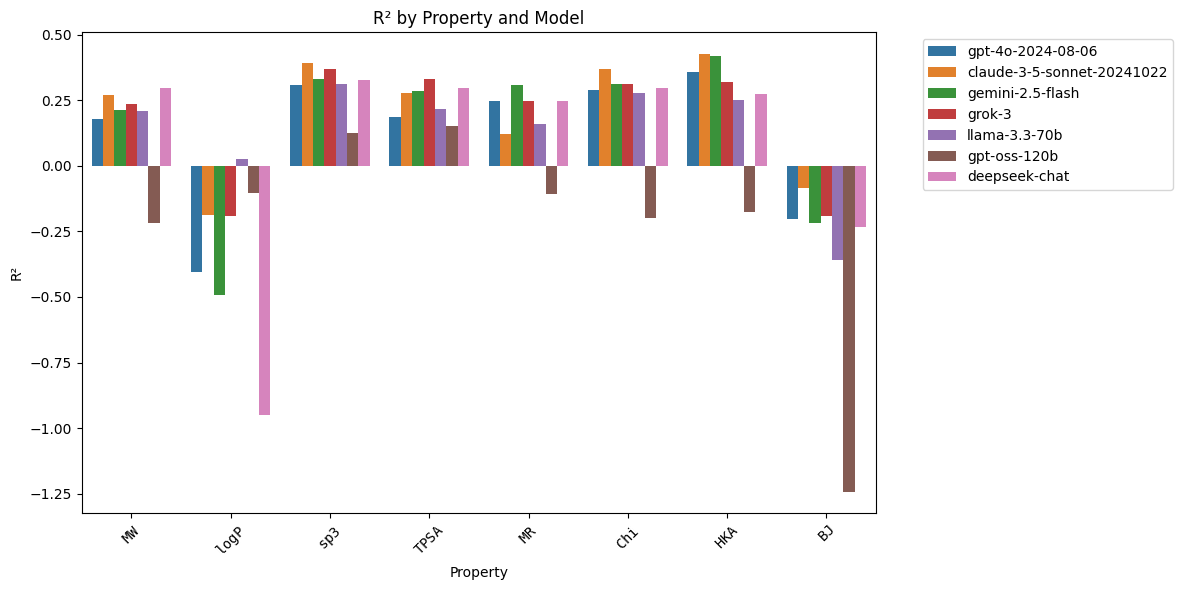

In [4]:
# seaborn 버전 호환을 위해 errorbar 제거
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="Property", y="R2", hue="Model", ci=None)

plt.xlabel("Property")
plt.ylabel("R²")
plt.title("R² by Property and Model")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [5]:
# 각 Transform, Property 조합별 최고 성능 모델 찾기
best_performers = (
    df_long.loc[df_long.groupby(["Transform", "Property"])["R2"].idxmax()]
    .sort_values(["Transform", "Property"])
    .reset_index(drop=True)
)

print(best_performers)


        Transform         Property                       Model        R2
0     Exponential    $\mathtt{BJ}$  claude-3-5-sonnet-20241022 -0.210101
1     Exponential   $\mathtt{Chi}$           gpt-4o-2024-08-06  0.470928
2     Exponential   $\mathtt{HKA}$                      grok-3  0.768163
3     Exponential    $\mathtt{MR}$  claude-3-5-sonnet-20241022  0.404175
4     Exponential    $\mathtt{MW}$           gpt-4o-2024-08-06  0.241328
5     Exponential  $\mathtt{TPSA}$            gemini-2.5-flash  0.012672
6     Exponential  $\mathtt{logP}$                gpt-oss-120b  0.504130
7     Exponential   $\mathtt{sp3}$            gemini-2.5-flash  0.647250
8     Logarithmic    $\mathtt{BJ}$  claude-3-5-sonnet-20241022 -0.048343
9     Logarithmic   $\mathtt{Chi}$            gemini-2.5-flash  0.219240
10    Logarithmic   $\mathtt{HKA}$           gpt-4o-2024-08-06  0.030328
11    Logarithmic    $\mathtt{MR}$            gemini-2.5-flash  0.092912
12    Logarithmic    $\mathtt{MW}$  claude-3-5-sonn

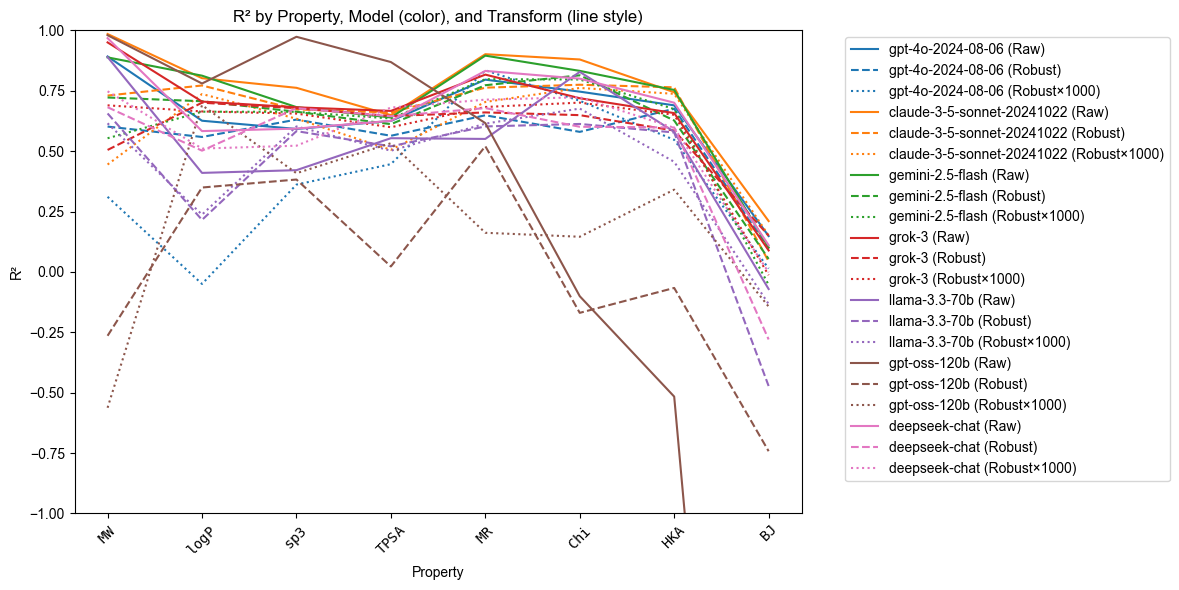

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정의
data = {
    ("Raw", r"$\mathtt{MW}$"): [0.8920417056, 0.9850983204, 0.8882802078, 0.950308718, 0.889812768, 0.9801160306, 0.9679543687],
    ("Raw", r"$\mathtt{logP}$"): [0.6259825777, 0.8021366322, 0.8125903208, 0.7053065945, 0.4099412495, 0.7801154591, 0.5830901294],
    ("Raw", r"$\mathtt{sp3}$"): [0.5919659638, 0.7622583629, 0.6822938659, 0.6816096897, 0.4212577259, 0.9736121223, 0.5933474764],
    ("Raw", r"$\mathtt{TPSA}$"): [0.6250215072, 0.649203558, 0.639355791, 0.6666185338, 0.5536279099, 0.8689601197, 0.6255905788],
    ("Raw", r"$\mathtt{MR}$"): [0.796139171, 0.901503481, 0.8955725956, 0.8169642171, 0.5506269947, 0.6160709989, 0.8323322488],
    ("Raw", r"$\mathtt{Chi}$"): [0.7464899041, 0.8797126528, 0.8324294078, 0.7191209908, 0.8283043795, -0.1007108865, 0.800281325],
    ("Raw", r"$\mathtt{HKA}$"): [0.689687194, 0.7439105606, 0.7534351432, 0.6576122769, 0.5801068137, -0.5163664741, 0.7005692339],
    ("Raw", r"$\mathtt{BJ}$"): [0.1483579387, 0.2105064467, 0.1011404669, 0.08877794806, -0.07093225864, -4.84771697, 0.1104847395],

    ("Robust", r"$\mathtt{MW}$"): [0.6017760534, 0.7301780374, 0.7221923203, 0.5050119561, 0.6560909297, -0.26451534, 0.6818890568],
    ("Robust", r"$\mathtt{logP}$"): [0.5587531009, 0.7719260225, 0.7066956148, 0.7006536685, 0.2153959428, 0.3494109678, 0.5019800026],
    ("Robust", r"$\mathtt{sp3}$"): [0.6307066371, 0.6729309302, 0.6632255117, 0.6777574721, 0.5829934769, 0.3824962252, 0.6782753384],
    ("Robust", r"$\mathtt{TPSA}$"): [0.5636920181, 0.6601526658, 0.6116989456, 0.6453474742, 0.5200149955, 0.02248254495, 0.6444981406],
    ("Robust", r"$\mathtt{MR}$"): [0.6485152519, 0.7629483502, 0.77296355, 0.6603848723, 0.6023755918, 0.5204454693, 0.678328541],
    ("Robust", r"$\mathtt{Chi}$"): [0.5798713892, 0.7749835897, 0.8141363437, 0.6491175635, 0.6126151552, -0.1695614107, 0.6010172574],
    ("Robust", r"$\mathtt{HKA}$"): [0.6756005045, 0.7643390954, 0.6269914342, 0.5852118587, 0.5772650649, -0.066468416, 0.5981743988],
    ("Robust", r"$\mathtt{BJ}$"): [0.09516526318, 0.0434815112, 0.05353940193, 0.1501238246, -0.4725821217, -0.7425111064, -0.2797764491],

    ("Robust×1000", r"$\mathtt{MW}$"): [0.3109043705, 0.4445861028, 0.5534408941, 0.6897390398, 0.6153367681, -0.5626770762, 0.7478592044],
    ("Robust×1000", r"$\mathtt{logP}$"): [-0.04985853214, 0.7365529359, 0.6634187914, 0.664467242, 0.2373208671, 0.6904967268, 0.5108399762],
    ("Robust×1000", r"$\mathtt{sp3}$"): [0.361477058, 0.6343255062, 0.6630059527, 0.6554806163, 0.6022780279, 0.4086309085, 0.5225261072],
    ("Robust×1000", r"$\mathtt{TPSA}$"): [0.4461607741, 0.5056055904, 0.6350948439, 0.5990410413, 0.5018566997, 0.5327879228, 0.6805408278],
    ("Robust×1000", r"$\mathtt{MR}$"): [0.8347878386, 0.7036832368, 0.7980964731, 0.6829153236, 0.6138420564, 0.1619799617, 0.7132663109],
    ("Robust×1000", r"$\mathtt{Chi}$"): [0.708588738, 0.7617053293, 0.7967206338, 0.7009700209, 0.6763836147, 0.1455294607, 0.7231748837],
    ("Robust×1000", r"$\mathtt{HKA}$"): [0.5469825282, 0.7374779605, 0.6741588036, 0.6505534829, 0.4558783502, 0.3405597852, 0.5966857691],
    ("Robust×1000", r"$\mathtt{BJ}$"): [0.01408253351, 0.1506844511, -0.05332427095, -0.01371110307, -0.1330035291, -0.1434864361, -0.001923421341]
}

models = ["gpt-4o-2024-08-06", "claude-3-5-sonnet-20241022", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]

# DataFrame 만들기
df = pd.DataFrame(data, index=models)

# 멀티인덱스 컬럼 -> 행 변환
df_melted = df.T.reset_index()
df_melted.columns = ["Transform", "Property", *models]

# Long format으로 변환
df_long = df_melted.melt(id_vars=["Transform", "Property"], var_name="Model", value_name="R2")

# 색상: 모델별, 선 스타일: Transform별
palette = sns.color_palette("tab10", n_colors=len(models))
color_map = dict(zip(models, palette))
linestyle_map = {"Raw": "-", "Robust": "--", "Robust×1000": ":"}

plt.figure(figsize=(12, 6))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
# 원하는 순서로 플롯 그리기
transform_order = ["Raw", "Robust", "Robust×1000"]
for model in models:
    for transform in transform_order:
        group = df_long[(df_long["Model"] == model) & (df_long["Transform"] == transform)]
        if not group.empty:
            plt.plot(group["Property"], group["R2"],
                     color=color_map[model],
                     linestyle=linestyle_map[transform],
                     label=f"{model} ({transform})")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Property")
plt.ylabel("R²")
plt.title("R² by Property, Model (color), and Transform (line style)")
plt.ylim(-1, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

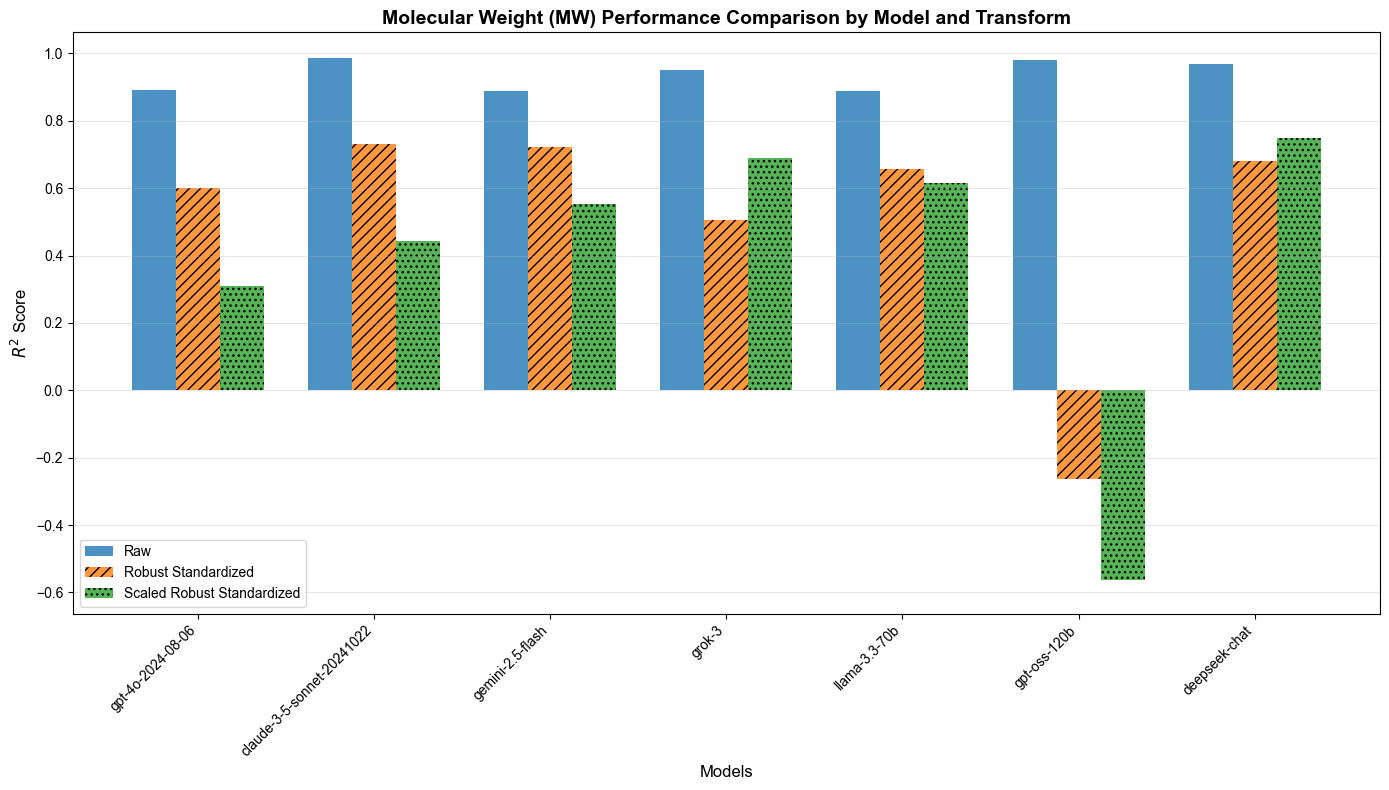

Molecular Weight (MW) $R^2$ Scores:
                               Raw  Robust Standardized  \
gpt-4o-2024-08-06           0.8920               0.6018   
claude-3-5-sonnet-20241022  0.9851               0.7302   
gemini-2.5-flash            0.8883               0.7222   
grok-3                      0.9503               0.5050   
llama-3.3-70b               0.8898               0.6561   
gpt-oss-120b                0.9801              -0.2645   
deepseek-chat               0.9680               0.6819   

                            Scaled Robust Standardized  
gpt-4o-2024-08-06                               0.3109  
claude-3-5-sonnet-20241022                      0.4446  
gemini-2.5-flash                                0.5534  
grok-3                                          0.6897  
llama-3.3-70b                                   0.6153  
gpt-oss-120b                                   -0.5627  
deepseek-chat                                   0.7479  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 분자량(mw) 데이터만 추출
mw_data = {
    "Raw": [0.8920417056, 0.9850983204, 0.8882802078, 0.950308718, 0.889812768, 0.9801160306, 0.9679543687],
    "Robust Standardized": [0.6017760534, 0.7301780374, 0.7221923203, 0.5050119561, 0.6560909297, -0.26451534, 0.6818890568],
    "Scaled Robust Standardized": [0.3109043705, 0.4445861028, 0.5534408941, 0.6897390398, 0.6153367681, -0.5626770762, 0.7478592044]
}

models = ["gpt-4o-2024-08-06", "claude-3-5-sonnet-20241022", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# DataFrame 생성
df_mw = pd.DataFrame(mw_data, index=models)

# 그래프 설정
fig, ax = plt.subplots(figsize=(14, 8))

# 막대 위치 설정
x = np.arange(len(models))
width = 0.25

# 각 변환 방법별로 다른 무늬(hatch) 패턴 설정
hatches = ['', '///', '...']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# 막대 그래프 그리기
bars1 = ax.bar(x - width, df_mw['Raw'], width, label='Raw', color=colors[0], hatch=hatches[0], alpha=0.8)
bars2 = ax.bar(x, df_mw['Robust Standardized'], width, label='Robust Standardized', color=colors[1], hatch=hatches[1], alpha=0.8)
bars3 = ax.bar(x + width, df_mw['Scaled Robust Standardized'], width, label='Scaled Robust Standardized', color=colors[2], hatch=hatches[2], alpha=0.8)

# 그래프 설정
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel(r'$R^2$ Score', fontsize=12)
ax.set_title('Molecular Weight (MW) Performance Comparison by Model and Transform', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# 격자 추가
ax.grid(True, alpha=0.3, axis='y')

# y축 범위 설정 (음수 값도 보이도록)
ax.set_ylim(bottom=min(df_mw.min()) - 0.1)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 수치 확인을 위한 데이터 출력
print(r"Molecular Weight (MW) $R^2$ Scores:")
print(df_mw.round(4))

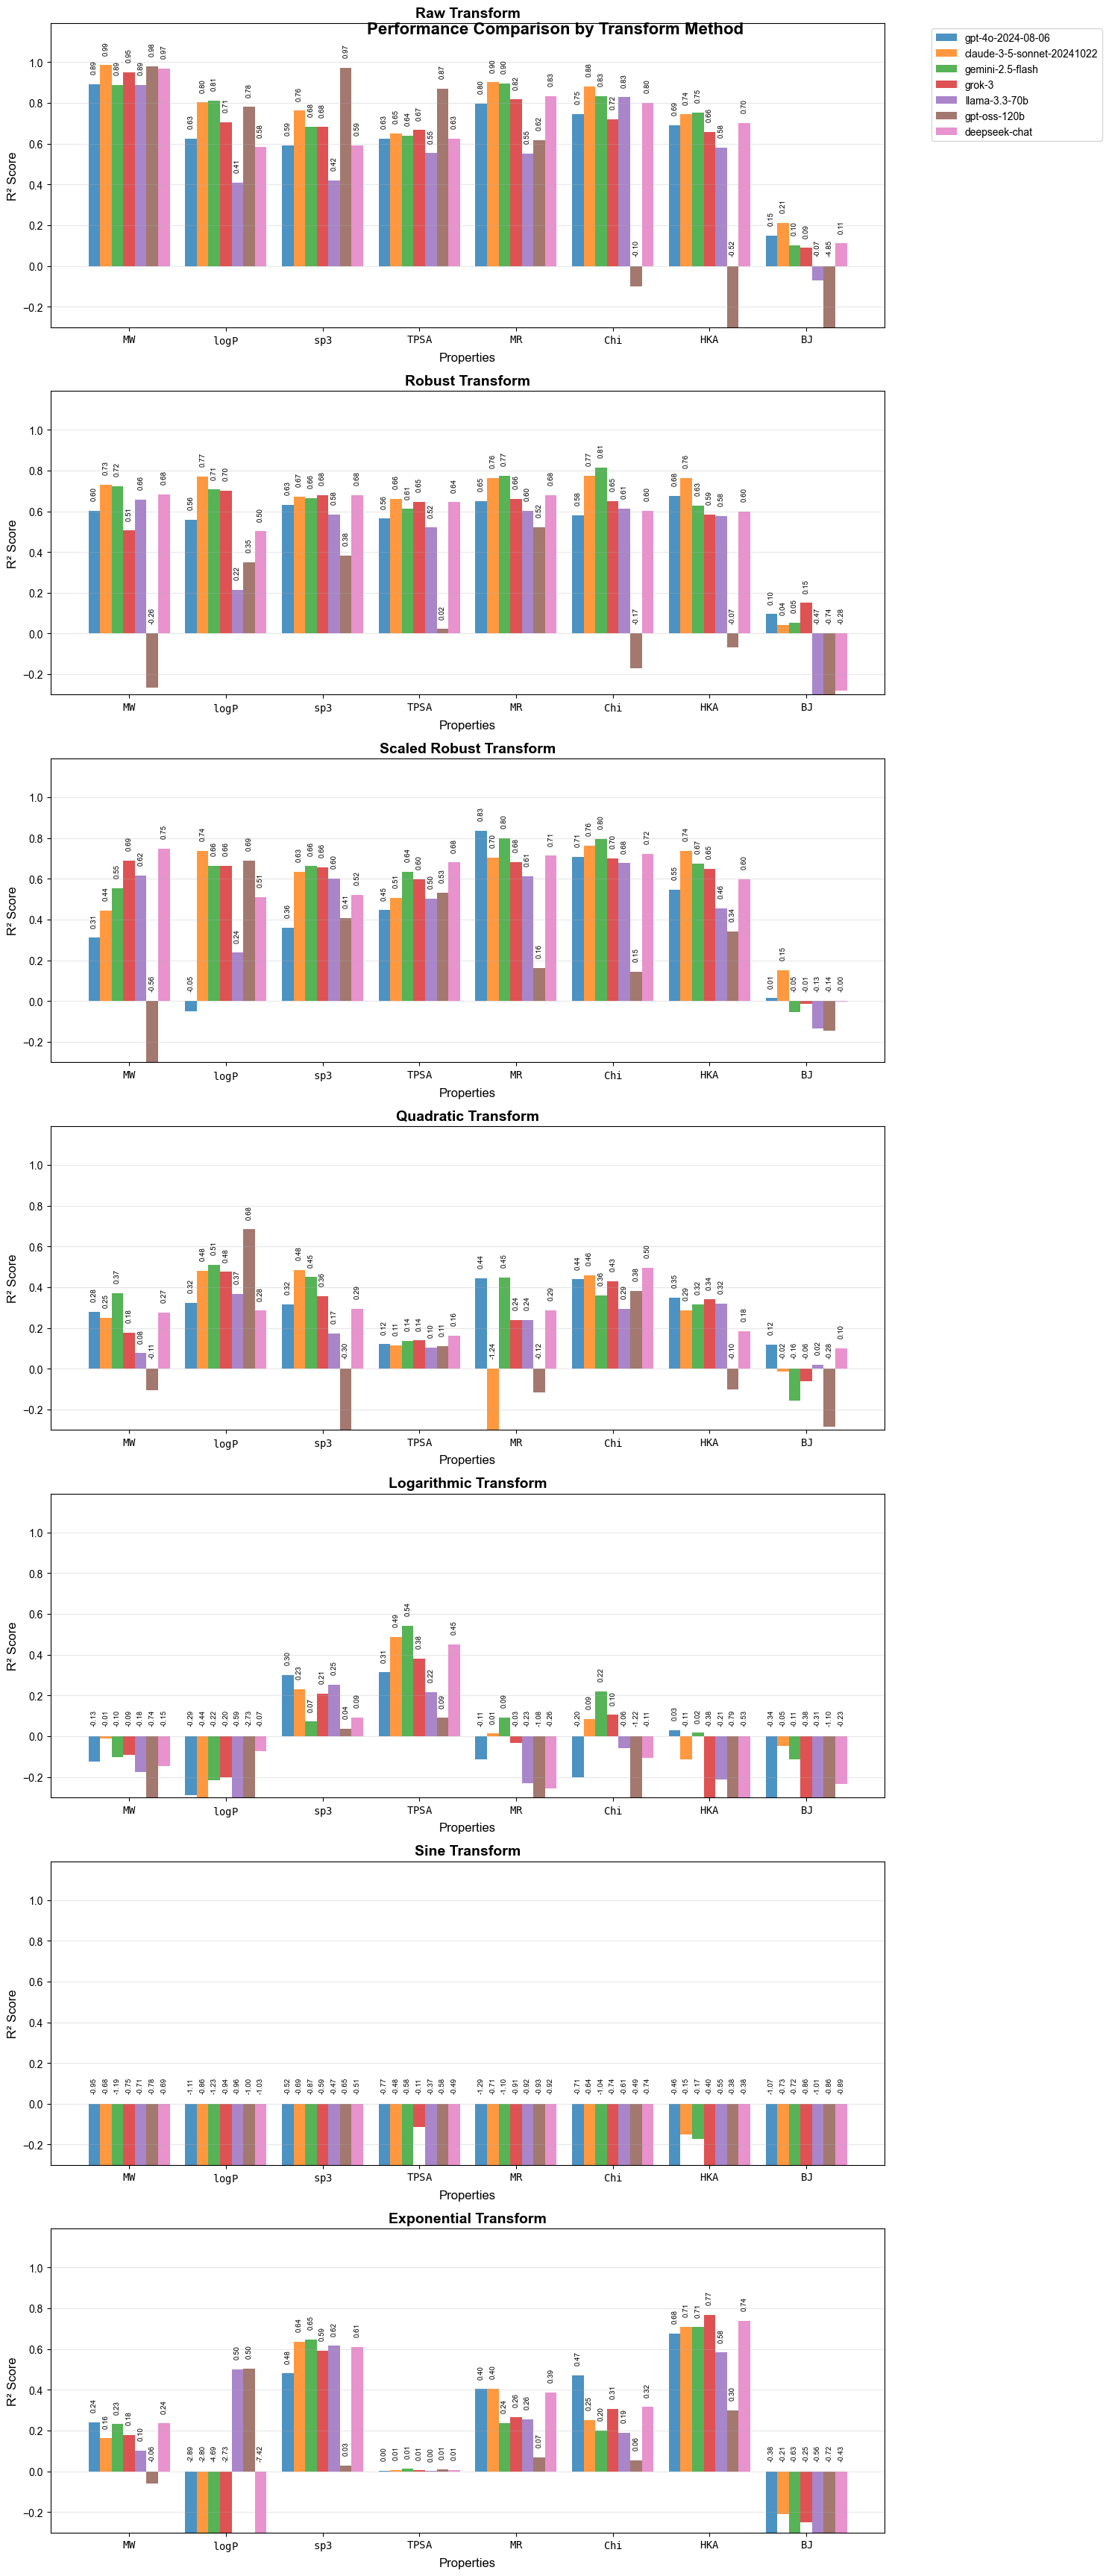

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["gpt-4o-2024-08-06", "claude-3-5-sonnet-20241022", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]
transforms = ["Raw", "Robust", "Scaled Robust", "Quadratic", "Logarithmic", "Sine", "Exponential"]

# 색상 팔레트 설정 (모델별)
palette = sns.color_palette("tab10", n_colors=len(models))
color_map = dict(zip(models, palette))

# 3행 1열 서브플롯 생성
fig, axes = plt.subplots(7, 1, figsize=(15, 35))
fig.suptitle('Performance Comparison by Transform Method', fontsize=16, fontweight='bold')

# 각 변환 방법별로 서브플롯 생성
for i, transform in enumerate(transforms):
    ax = axes[i]
    
    # 각 property에 대해 모든 모델의 성능을 막대그래프로 표시
    x = np.arange(len(properties))
    width = 0.12  # 막대 너비 (7개 모델이므로 좁게)
    
    for j, model in enumerate(models):
        values = []
        for prop in properties:
            values.append(data[(transform, prop)][j])
        
        # 각 모델별로 막대 그리기
        bars = ax.bar(x + j * width - (len(models)-1) * width/2, values, 
                     width, label=model, color=color_map[model], alpha=0.8)
        
                # 각 막대 위에 값 표시 (검은색)
        for k, (bar, value) in enumerate(zip(bars, values)):
            if value >= 0:
                y_pos = bar.get_height() + 0.05
                va = 'bottom'
            else:
                y_pos = 0.05
                va = 'bottom'
            
            ax.text(bar.get_x() + bar.get_width()/2, y_pos, f'{value:.2f}',
                   ha='center', va=va, fontsize=7, rotation=90, 
                   color='black', weight='normal')
    
    # 서브플롯 설정
    ax.set_title(f'{transform} Transform', fontsize=14, fontweight='bold')
    ax.set_xlabel('Properties', fontsize=12)
    ax.set_ylabel('R² Score', fontsize=12)
    ax.set_xticks(x)
    ax.set_ylim(-0.3, 1.19)
    ax.set_xticklabels(properties)
    ax.grid(True, alpha=0.3, axis='y')
    
    # 범례는 첫 번째 서브플롯에만 표시
    if i == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

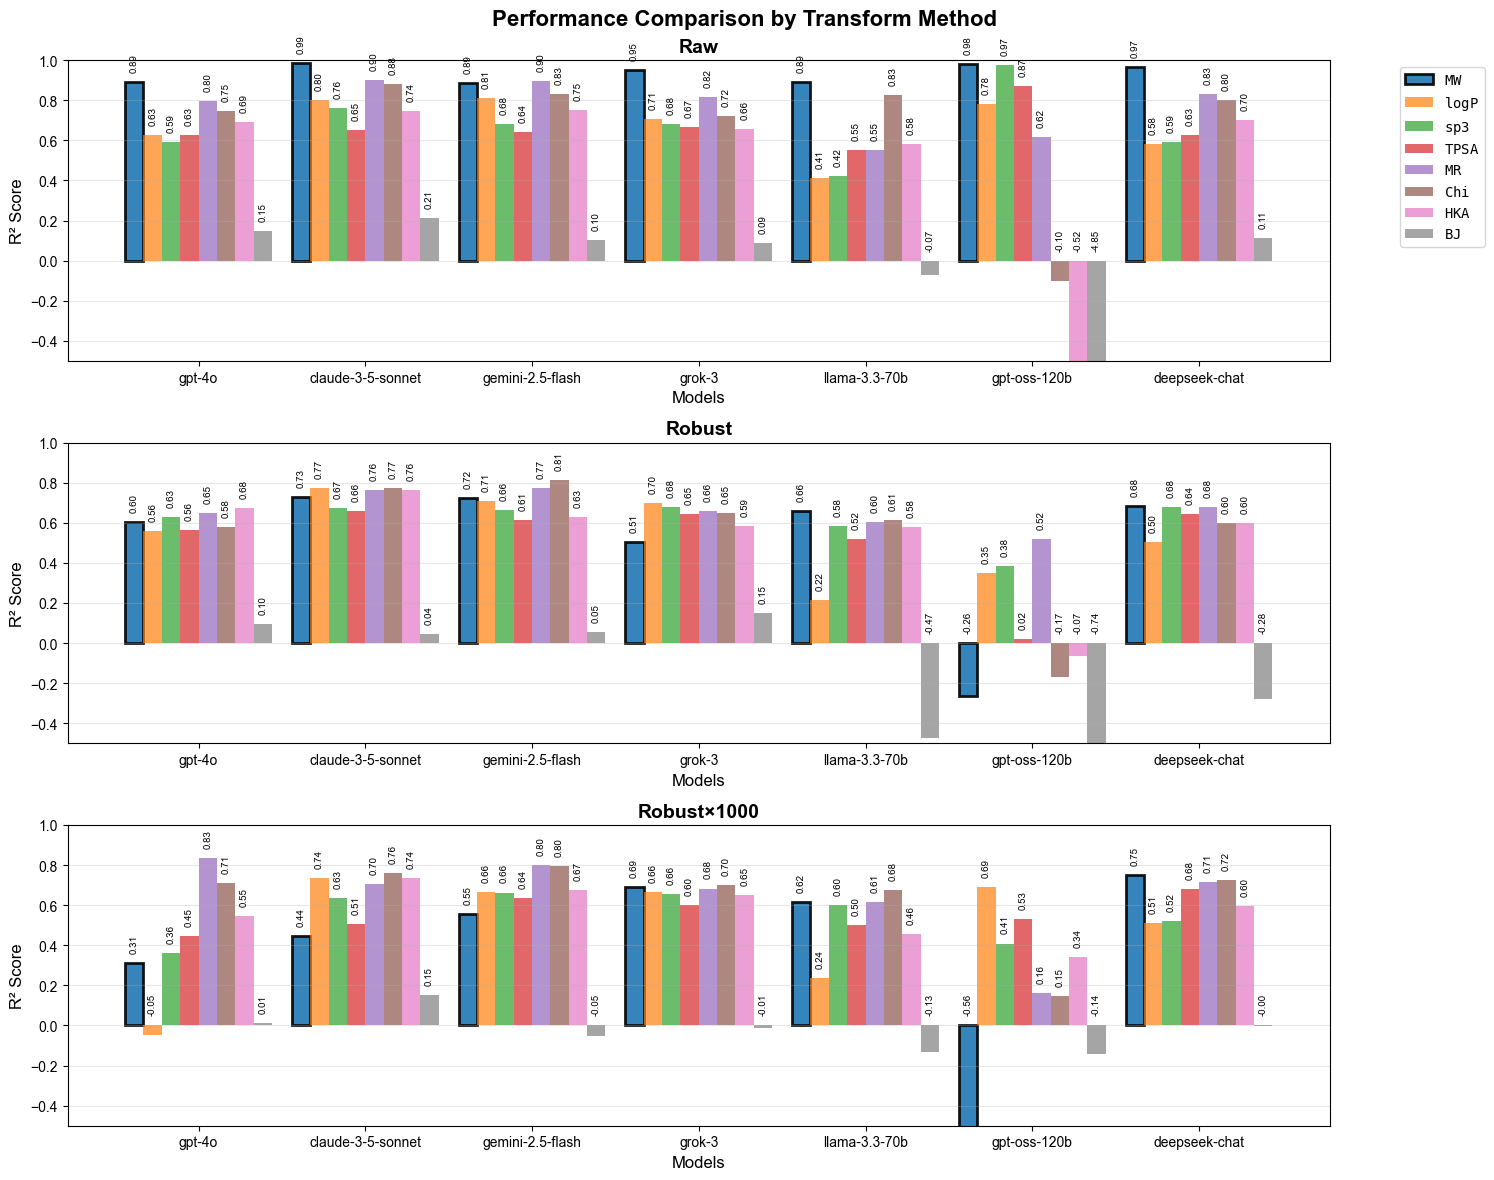

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["gpt-4o", "claude-3-5-sonnet", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]
# models = ["gpt-4o-2024-08-06", "claude-3-5-sonnet-20241022", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]
transforms = ["Raw", "Robust", "Robust×1000"]

# 색상 팔레트 설정 (property별)
property_palette = sns.color_palette("tab10", n_colors=len(properties))
property_color_map = dict(zip(properties, property_palette))

# 3행 1열 서브플롯 생성
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Performance Comparison by Transform Method', fontsize=16, fontweight='bold')

# 각 변환 방법별로 서브플롯 생성
for i, transform in enumerate(transforms):
    ax = axes[i]
    
    # x축: 모델들
    x = np.arange(len(models))
    width = 0.11  # 막대 너비 (8개 property이므로 좁게)
    
    # 각 property별로 막대 그리기
    for j, prop in enumerate(properties):
        values = []
        # 각 모델별 값 수집
        for k in range(len(models)):
            values.append(data[(transform, prop)][k])
        
        # MW는 다른 스타일로 표시 (굵은 테두리)
        if prop == r"$\mathtt{MW}$":
            bars = ax.bar(x + j * width - (len(properties)-1) * width/2, values, 
                         width, label=prop, color=property_color_map[prop], 
                         alpha=0.9, edgecolor='black', linewidth=2)
        else:
            bars = ax.bar(x + j * width - (len(properties)-1) * width/2, values, 
                         width, label=prop, color=property_color_map[prop], alpha=0.7)
            
                # 각 막대 위에 값 표시 (검은색)
        for k, (bar, value) in enumerate(zip(bars, values)):
            if value >= 0:
                y_pos = bar.get_height() + 0.05
                va = 'bottom'
            else:
                y_pos = 0.05
                va = 'bottom'
            
            ax.text(bar.get_x() + bar.get_width()/2, y_pos, f'{value:.2f}',
                   ha='center', va=va, fontsize=7, rotation=90, 
                   color='black', weight='normal')
    
    # 서브플롯 설정
    ax.set_title(f'{transform}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel('R² Score', fontsize=12)
    ax.set_xticks(x)
    ax.set_ylim(-0.5, 1)
    ax.set_xticklabels(models, rotation=0, ha='center')
    ax.grid(True, alpha=0.3, axis='y')
    
    # 범례는 첫 번째 서브플롯에만 표시
    if i == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정
plt.tight_layout()
plt.show()

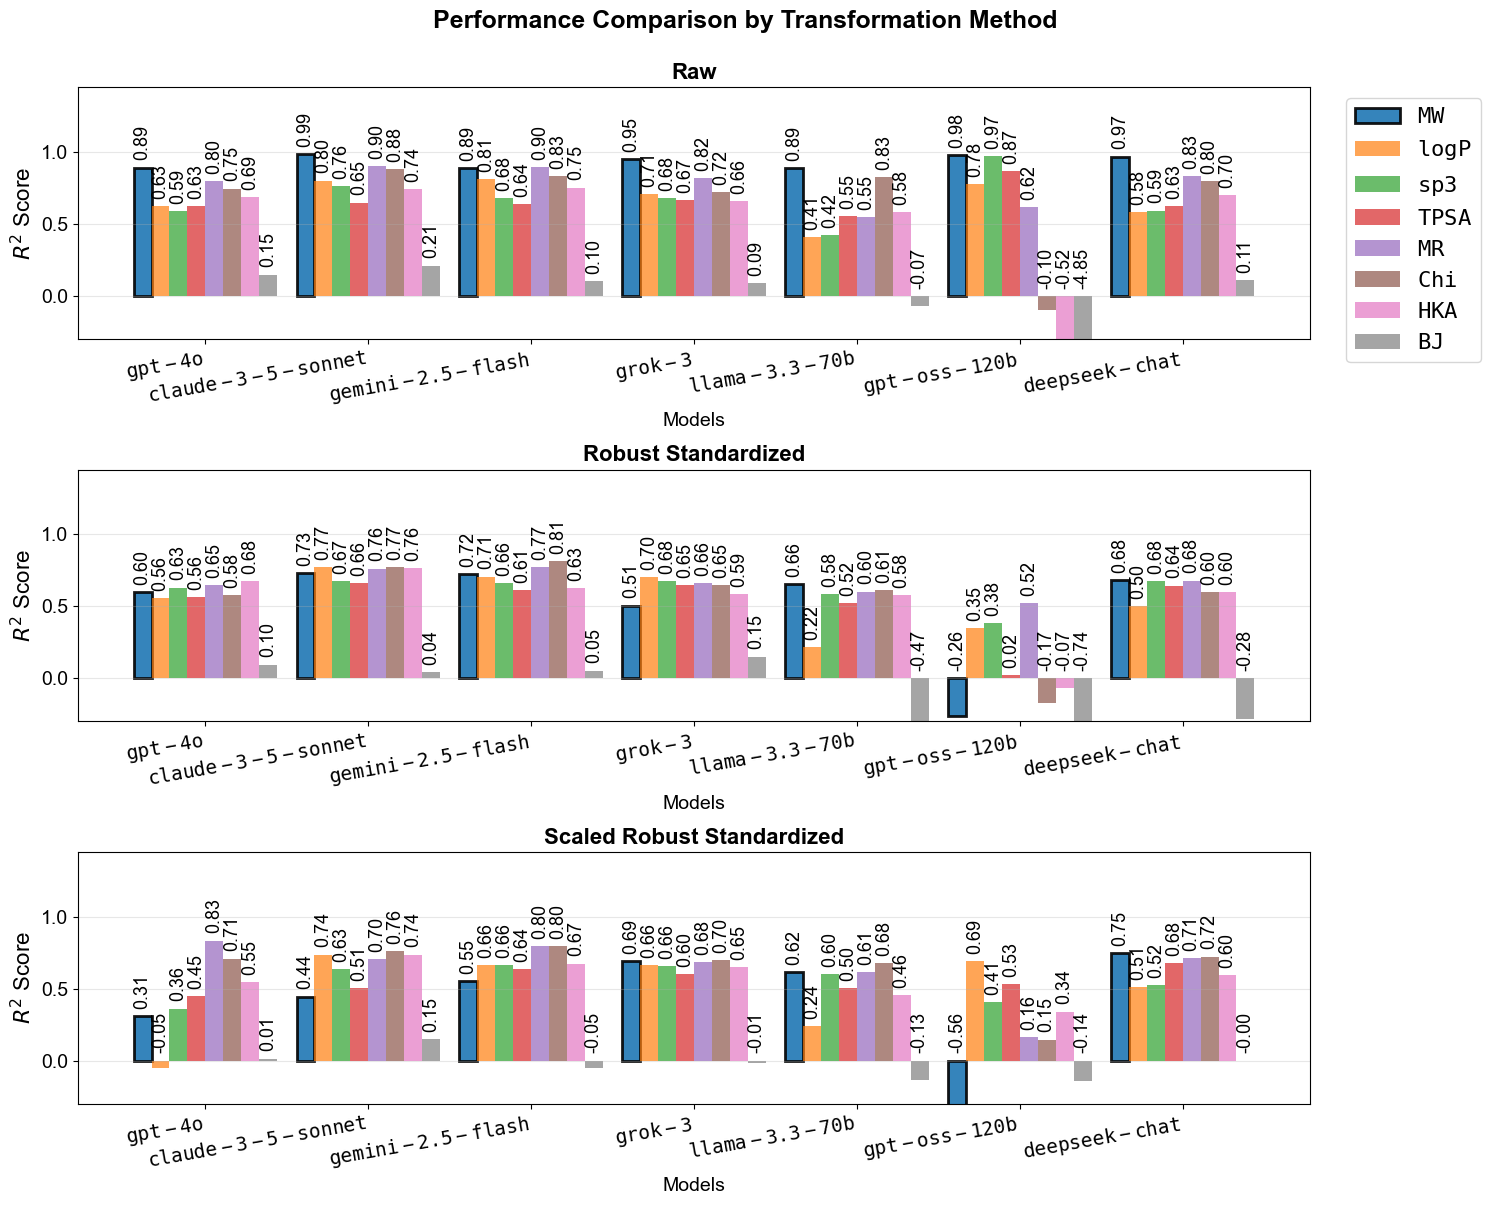

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = [r"$\mathtt{gpt-4o}$", r"$\mathtt{claude-3-5-sonnet}$", r"$\mathtt{gemini-2.5-flash}$", r"$\mathtt{grok-3}$", r"$\mathtt{llama-3.3-70b}$", r"$\mathtt{gpt-oss-120b}$", r"$\mathtt{deepseek-chat}$"]
transforms = ["Raw", "Robust Standardized", "Scaled Robust Standardized", "Quadratic", "Logarithmic", "Sine", "Exponential"]

# 색상 팔레트 설정 (property별)
property_palette = sns.color_palette("tab10", n_colors=len(properties))
property_color_map = dict(zip(properties, property_palette))

# 3행 1열 서브플롯 생성
num = 3
fig, axes = plt.subplots(num, 1, figsize=(15, num * 4))
fig.suptitle('Performance Comparison by Transformation Method', fontsize=18, fontweight='bold', y=1)

# 각 변환 방법별로 서브플롯 생성 (한 번만!)
# 각 변환 방법별로 서브플롯 생성
for i, transform in enumerate(transforms[:num]):
    ax = axes[i]
    
    # x축: 모델들
    x = np.arange(len(models))
    width = 0.11
    
    # 1단계: 모든 막대를 먼저 그리기 (테두리 없이)
    all_bars = {}  # MW 막대 위치 저장용
    for j, prop in enumerate(properties):
        values = []
        for k in range(len(models)):
            values.append(data[(transform, prop)][k])
        
        bars = ax.bar(x + j * width - (len(properties)-1) * width/2, values, 
                     width, label=prop, color=property_color_map[prop], alpha=0.7)
        
        # MW 막대 위치 저장
        if prop == r"$\mathtt{MW}$":
            all_bars[prop] = bars
        
        # 값 표시
        for k, (bar, value) in enumerate(zip(bars, values)):
            if value >= 0:
                y_pos = bar.get_height() + 0.05
                va = 'bottom'
            else:
                y_pos = 0.05
                va = 'bottom'
            
            ax.text(bar.get_x() + bar.get_width()/2, y_pos, f'{value:.2f}',
                   ha='center', va=va, fontsize=13, rotation=90, 
                   color='black', weight='normal')
    
    # 2단계: MW 막대에만 테두리 추가
    for bar in all_bars[r"$\mathtt{MW}$"]:
        bar.set_edgecolor('black')
        bar.set_linewidth(2)
        bar.set_alpha(0.9)
    
    # 서브플롯 설정
    ax.set_title(f'{transform}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Models', fontsize=14)
    ax.set_ylabel(r'$R^2$ Score', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(x)
    ax.set_ylim(-0.3, 1.45)
    ax.set_xticklabels(models, rotation=10, ha='right', va='top', fontsize=14)
    ax.grid(True, alpha=0.3, axis='y')
    
    if i == 0:
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize = 16)

# 두 번째 for 루프 제거!

# 레이아웃 조정
plt.tight_layout()
plt.show()

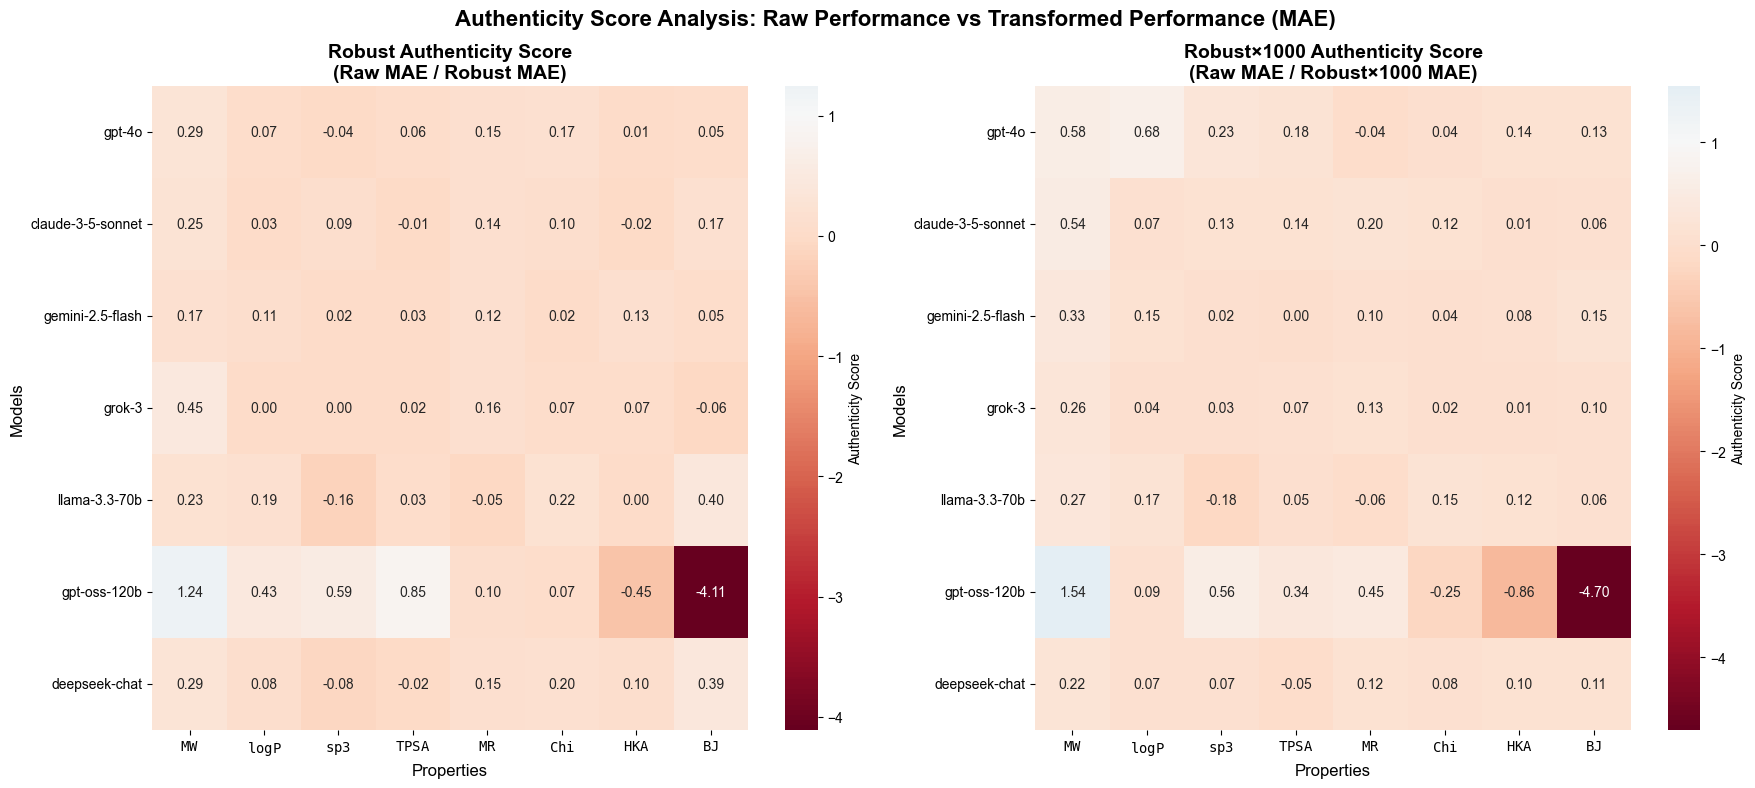

Robust Authenticity Score Statistics:
Mean: 0.064
Std: 0.611
Min: -4.105
Max: 1.245

Robust×1000 Authenticity Score Statistics:
Mean: 0.058
Std: 0.703
Min: -4.704
Max: 1.543


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["gpt-4o", "claude-3-5-sonnet", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]
mae_data = {
    ("Raw", r"$\mathtt{MW}$"): [20.91047, 6.76517, 17.01374, 6.62659, 23.5947, 2.97645, 9.18972],
    ("Raw", r"$\mathtt{logP}$"): [0.877647, 0.6074995, 0.5682583, 0.6319297, 0.9394083, 0.6438911, 0.8835301],
    ("Raw", r"$\mathtt{sp3}$"): [0.877647, 0.6074995, 0.5682583, 0.6319297, 0.9394083, 0.6438911, 0.8835301],
    ("Raw", r"$\mathtt{TPSA}$"): [12.6853, 1.641, 13.2373, 1.229, 15.3627, 7.0578, 12.0272],
    ("Raw", r"$\mathtt{MR}$"): [9.214112, 6.009068, 6.265315, 7.707892, 12.093219, 10.702802, 8.681864],
    ("Raw", r"$\mathtt{Chi}$"): [1.02284269, 0.6889714438, 0.7734026948, 0.9315671442, 0.8900073539, 2.031444836, 0.9300872344],
    ("Raw", r"$\mathtt{HKA}$"): [0.3809, 0.3354, 0.3386, 0.3811, 0.477, 0.8002, 0.3732],
    ("Raw", r"$\mathtt{BJ}$"): [0.3613183745, 0.334260688, 0.3698263682, 0.4143809342, 0.4235641503, 0.9475145901, 0.3709349823],

    ("Robust", r"$\mathtt{MW}$"): [0.4991041298, 0.3422270896, 0.3786838367, 0.4825400381, 0.4991462906, 0.878857752, 0.4463054074],
    ("Robust", r"$\mathtt{logP}$"): [0.6924950731, 0.4585829015, 0.5143903392, 0.52799994, 0.845125884, 0.8452699616, 0.7088422291],
    ("Robust", r"$\mathtt{sp3}$"): [0.2474373884, 0.2577946205, 0.2545912122, 0.2668702491, 0.2911583201, 0.3706594176, 0.2486239902],
    ("Robust", r"$\mathtt{TPSA}$"): [0.3587960391, 0.3102055199, 0.3557088009, 0.2996239751, 0.4072434042, 0.4962472184, 0.3139313304],
    ("Robust", r"$\mathtt{MR}$"): [0.4584360022, 0.3342853815, 0.3516178219, 0.4290218477, 0.5221827444, 0.5655826147, 0.4665436963],
    ("Robust", r"$\mathtt{Chi}$"): [0.5632313451, 0.3767596589, 0.3775211794, 0.4884442534, 0.605548961, 0.9868696939, 0.5581607777],
    ("Robust", r"$\mathtt{HKA}$"): [0.3980896253, 0.3161799177, 0.3903019985, 0.4077052919, 0.4032391924, 0.6971440531, 0.4095930117],
    ("Robust", r"$\mathtt{BJ}$"): [0.7021415013, 0.6833816916, 0.6795033783, 0.6934155517, 0.9238788946, 0.9784458191, 0.8736358834],

    ("Robust×1000", r"$\mathtt{MW}$"): [609.2272767, 500.5988529, 458.5491145, 405.4723066, 534.0996171, 2.2423188, 417.5330966],
    ("Robust×1000", r"$\mathtt{logP}$"): [810.6843978, 509.1733131, 554.9312235, 566.5417742, 781.4477518, 592.7990448, 687.5530126],
    ("Robust×1000", r"$\mathtt{sp3}$"): [333.8211628, 259.9083043, 268.6619443, 259.9812755, 293.1923877, 345.7540324, 294.0247874],
    ("Robust×1000", r"$\mathtt{TPSA}$"): [483.9159177, 424.835716, 336.5159117, 328.3882244, 411.1575888, 387.1798034, 339.8556683],
    ("Robust×1000", r"$\mathtt{MR}$"): [319.9027786, 342.0426566, 335.0545385, 407.3535083, 505.6972954, 600.0414086, 445.2394884],
    ("Robust×1000", r"$\mathtt{Chi}$"): [512.240627, 373.1595674, 396.3865957, 447.2106754, 540.956467, 703.3280707, 457.5819023],
    ("Robust×1000", r"$\mathtt{HKA}$"): [440.5228577, 342.8279449, 362.2062674, 392.283327, 471.9503454, 523.4673179, 395.441433],
    ("Robust×1000", r"$\mathtt{BJ}$"): [716.6585484, 645.4037876, 732.7069667, 727.6342491, 784.0118045, 806.0269354, 735.0355499]
}

# Authenticity Score 계산: Raw MAE / Transformed MAE (1보다 크면 변환이 성능 향상)

# Robust Authenticity Score 계산
robust_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_mae = data[("Raw", prop)][model_idx]
        robust_mae = data[("Robust", prop)][model_idx]
        
        # 0으로 나누기 방지
        robust_authenticity[i, j] = raw_mae - robust_mae

# Robust×1000 Authenticity Score 계산
robust1000_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_mae = data[("Raw", prop)][model_idx]
        robust1000_mae = data[("Robust×1000", prop)][model_idx]
        
        robust1000_authenticity[i, j] = raw_mae - robust1000_mae
        
# 2개의 히트맵을 나란히 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Robust Authenticity Score 히트맵
df_robust = pd.DataFrame(robust_authenticity, index=models, columns=properties)
sns.heatmap(df_robust, annot=True, fmt='.2f', cmap='RdBu', center=1, 
            ax=ax1, cbar_kws={'label': 'Authenticity Score'})
ax1.set_title('Robust Authenticity Score\n(Raw MAE / Robust MAE)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Properties', fontsize=12)
ax1.set_ylabel('Models', fontsize=12)

# Robust×1000 Authenticity Score 히트맵
df_robust1000 = pd.DataFrame(robust1000_authenticity, index=models, columns=properties)
sns.heatmap(df_robust1000, annot=True, fmt='.2f', cmap='RdBu', center=1,
            ax=ax2, cbar_kws={'label': 'Authenticity Score'})
ax2.set_title('Robust×1000 Authenticity Score\n(Raw MAE / Robust×1000 MAE)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Properties', fontsize=12)
ax2.set_ylabel('Models', fontsize=12)

# 전체 제목
fig.suptitle('Authenticity Score Analysis: Raw Performance vs Transformed Performance (MAE)', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("Robust Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust_authenticity):.3f}")
print(f"Std: {np.nanstd(robust_authenticity):.3f}")
print(f"Min: {np.nanmin(robust_authenticity):.3f}")
print(f"Max: {np.nanmax(robust_authenticity):.3f}")

print("\nRobust×1000 Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust1000_authenticity):.3f}")
print(f"Std: {np.nanstd(robust1000_authenticity):.3f}")
print(f"Min: {np.nanmin(robust1000_authenticity):.3f}")
print(f"Max: {np.nanmax(robust1000_authenticity):.3f}")

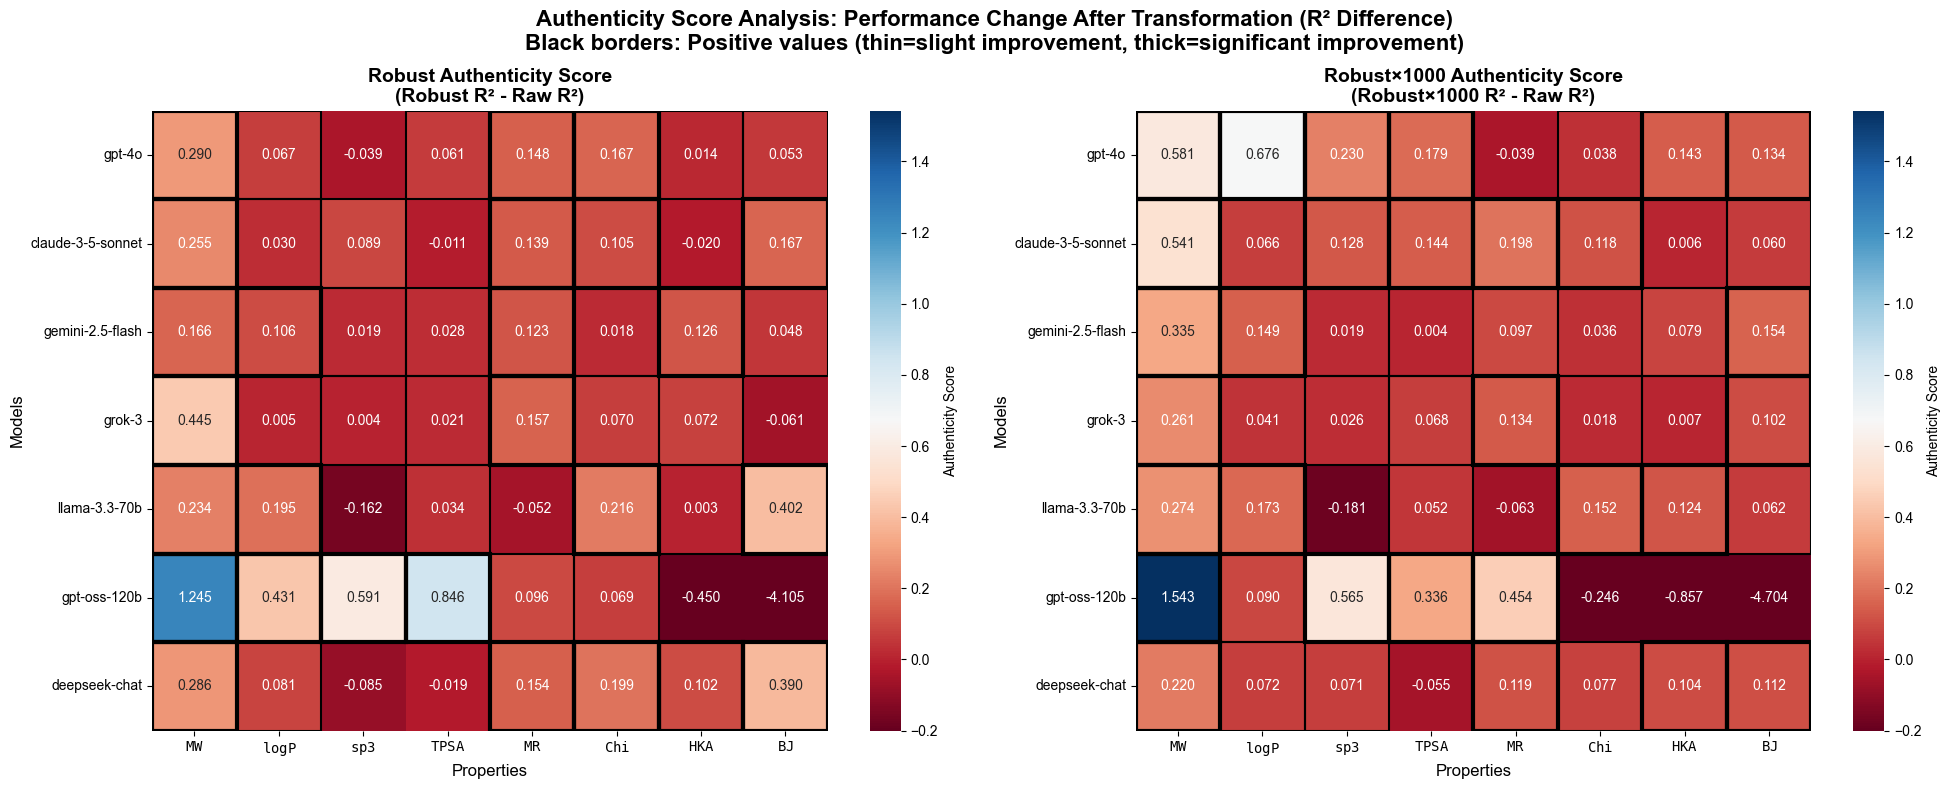

Robust Authenticity Score Statistics:
Mean: 0.064
Std: 0.611
Min: -4.105
Max: 1.245

Robust×1000 Authenticity Score Statistics:
Mean: 0.058
Std: 0.703
Min: -4.704
Max: 1.543


In [93]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["gpt-4o", "claude-3-5-sonnet", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]
# 데이터 정의
data = {
    ("Raw", r"$\mathtt{MW}$"): [0.8920417056, 0.9850983204, 0.8882802078, 0.950308718, 0.889812768, 0.9801160306, 0.9679543687],
    ("Raw", r"$\mathtt{logP}$"): [0.6259825777, 0.8021366322, 0.8125903208, 0.7053065945, 0.4099412495, 0.7801154591, 0.5830901294],
    ("Raw", r"$\mathtt{sp3}$"): [0.5919659638, 0.7622583629, 0.6822938659, 0.6816096897, 0.4212577259, 0.9736121223, 0.5933474764],
    ("Raw", r"$\mathtt{TPSA}$"): [0.6250215072, 0.649203558, 0.639355791, 0.6666185338, 0.5536279099, 0.8689601197, 0.6255905788],
    ("Raw", r"$\mathtt{MR}$"): [0.796139171, 0.901503481, 0.8955725956, 0.8169642171, 0.5506269947, 0.6160709989, 0.8323322488],
    ("Raw", r"$\mathtt{Chi}$"): [0.7464899041, 0.8797126528, 0.8324294078, 0.7191209908, 0.8283043795, -0.1007108865, 0.800281325],
    ("Raw", r"$\mathtt{HKA}$"): [0.689687194, 0.7439105606, 0.7534351432, 0.6576122769, 0.5801068137, -0.5163664741, 0.7005692339],
    ("Raw", r"$\mathtt{BJ}$"): [0.1483579387, 0.2105064467, 0.1011404669, 0.08877794806, -0.07093225864, -4.84771697, 0.1104847395],

    ("Robust", r"$\mathtt{MW}$"): [0.6017760534, 0.7301780374, 0.7221923203, 0.5050119561, 0.6560909297, -0.26451534, 0.6818890568],
    ("Robust", r"$\mathtt{logP}$"): [0.5587531009, 0.7719260225, 0.7066956148, 0.7006536685, 0.2153959428, 0.3494109678, 0.5019800026],
    ("Robust", r"$\mathtt{sp3}$"): [0.6307066371, 0.6729309302, 0.6632255117, 0.6777574721, 0.5829934769, 0.3824962252, 0.6782753384],
    ("Robust", r"$\mathtt{TPSA}$"): [0.5636920181, 0.6601526658, 0.6116989456, 0.6453474742, 0.5200149955, 0.02248254495, 0.6444981406],
    ("Robust", r"$\mathtt{MR}$"): [0.6485152519, 0.7629483502, 0.77296355, 0.6603848723, 0.6023755918, 0.5204454693, 0.678328541],
    ("Robust", r"$\mathtt{Chi}$"): [0.5798713892, 0.7749835897, 0.8141363437, 0.6491175635, 0.6126151552, -0.1695614107, 0.6010172574],
    ("Robust", r"$\mathtt{HKA}$"): [0.6756005045, 0.7643390954, 0.6269914342, 0.5852118587, 0.5772650649, -0.066468416, 0.5981743988],
    ("Robust", r"$\mathtt{BJ}$"): [0.09516526318, 0.0434815112, 0.05353940193, 0.1501238246, -0.4725821217, -0.7425111064, -0.2797764491],

    ("Robust×1000", r"$\mathtt{MW}$"): [0.3109043705, 0.4445861028, 0.5534408941, 0.6897390398, 0.6153367681, -0.5626770762, 0.7478592044],
    ("Robust×1000", r"$\mathtt{logP}$"): [-0.04985853214, 0.7365529359, 0.6634187914, 0.664467242, 0.2373208671, 0.6904967268, 0.5108399762],
    ("Robust×1000", r"$\mathtt{sp3}$"): [0.361477058, 0.6343255062, 0.6630059527, 0.6554806163, 0.6022780279, 0.4086309085, 0.5225261072],
    ("Robust×1000", r"$\mathtt{TPSA}$"): [0.4461607741, 0.5056055904, 0.6350948439, 0.5990410413, 0.5018566997, 0.5327879228, 0.6805408278],
    ("Robust×1000", r"$\mathtt{MR}$"): [0.8347878386, 0.7036832368, 0.7980964731, 0.6829153236, 0.6138420564, 0.1619799617, 0.7132663109],
    ("Robust×1000", r"$\mathtt{Chi}$"): [0.708588738, 0.7617053293, 0.7967206338, 0.7009700209, 0.6763836147, 0.1455294607, 0.7231748837],
    ("Robust×1000", r"$\mathtt{HKA}$"): [0.5469825282, 0.7374779605, 0.6741588036, 0.6505534829, 0.4558783502, 0.3405597852, 0.5966857691],
    ("Robust×1000", r"$\mathtt{BJ}$"): [0.01408253351, 0.1506844511, -0.05332427095, -0.01371110307, -0.1330035291, -0.1434864361, -0.001923421341]
}

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["gpt-4o", "claude-3-5-sonnet", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]

# Authenticity Score 계산: Transformed R² - Raw R² (차이 기반)

# Robust Authenticity Score 계산
robust_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust_r2 = data[("Robust", prop)][model_idx]
        
        robust_authenticity[i, j] = raw_r2 - robust_r2

# Robust×1000 Authenticity Score 계산
robust1000_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust1000_r2 = data[("Robust×1000", prop)][model_idx]
        
        robust1000_authenticity[i, j] = raw_r2 - robust1000_r2

# 2개의 히트맵을 나란히 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 임계값 설정
positive_threshold = 0.0  # 양수 임계값
significant_threshold = 0.1  # 유의미한 개선 임계값

# 색상 범위 설정 (특정 값 이하는 같은 색으로)
vmin_threshold = -0.2  # 이 값 이하는 모두 같은 색으로
vmax = max(np.nanmax(robust_authenticity), np.nanmax(robust1000_authenticity))

center = (vmin_threshold + vmax)/2

# Robust Authenticity Score 히트맵
df_robust = pd.DataFrame(robust_authenticity, index=models, columns=properties)
sns.heatmap(df_robust, annot=True, fmt='.3f', cmap='RdBu', center=center, 
            vmin=vmin_threshold, vmax=vmax,
            ax=ax1, cbar_kws={'label': 'Authenticity Score'})

# 양수값과 유의미한 개선값에 테두리 추가
for i in range(len(models)):
    for j in range(len(properties)):
        value = robust_authenticity[i, j]
        if value > significant_threshold:  # 유의미한 개선
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax1.add_patch(rect)
        elif value > positive_threshold:  # 약간의 개선
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax1.add_patch(rect)

ax1.set_title('Robust Authenticity Score\n(Robust R² - Raw R²)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Properties', fontsize=12)
ax1.set_ylabel('Models', fontsize=12)

# Robust×1000 Authenticity Score 히트맵
df_robust1000 = pd.DataFrame(robust1000_authenticity, index=models, columns=properties)
sns.heatmap(df_robust1000, annot=True, fmt='.3f', cmap='RdBu', center=center,
            vmin=vmin_threshold, vmax=vmax,
            ax=ax2, cbar_kws={'label': 'Authenticity Score'})

# 양수값과 유의미한 개선값에 테두리 추가
for i in range(len(models)):
    for j in range(len(properties)):
        value = robust1000_authenticity[i, j]
        if value > significant_threshold:  # 유의미한 개선
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax2.add_patch(rect)
        elif value > positive_threshold:  # 약간의 개선
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax2.add_patch(rect)

ax2.set_title('Robust×1000 Authenticity Score\n(Robust×1000 R² - Raw R²)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Properties', fontsize=12)
ax2.set_ylabel('Models', fontsize=12)

# 전체 제목
fig.suptitle('Authenticity Score Analysis: Performance Change After Transformation (R² Difference)\nBlack borders: Positive values (thin=slight improvement, thick=significant improvement)', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("Robust Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust_authenticity):.3f}")
print(f"Std: {np.nanstd(robust_authenticity):.3f}")
print(f"Min: {np.nanmin(robust_authenticity):.3f}")
print(f"Max: {np.nanmax(robust_authenticity):.3f}")

print("\nRobust×1000 Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust1000_authenticity):.3f}")
print(f"Std: {np.nanstd(robust1000_authenticity):.3f}")
print(f"Min: {np.nanmin(robust1000_authenticity):.3f}")
print(f"Max: {np.nanmax(robust1000_authenticity):.3f}")

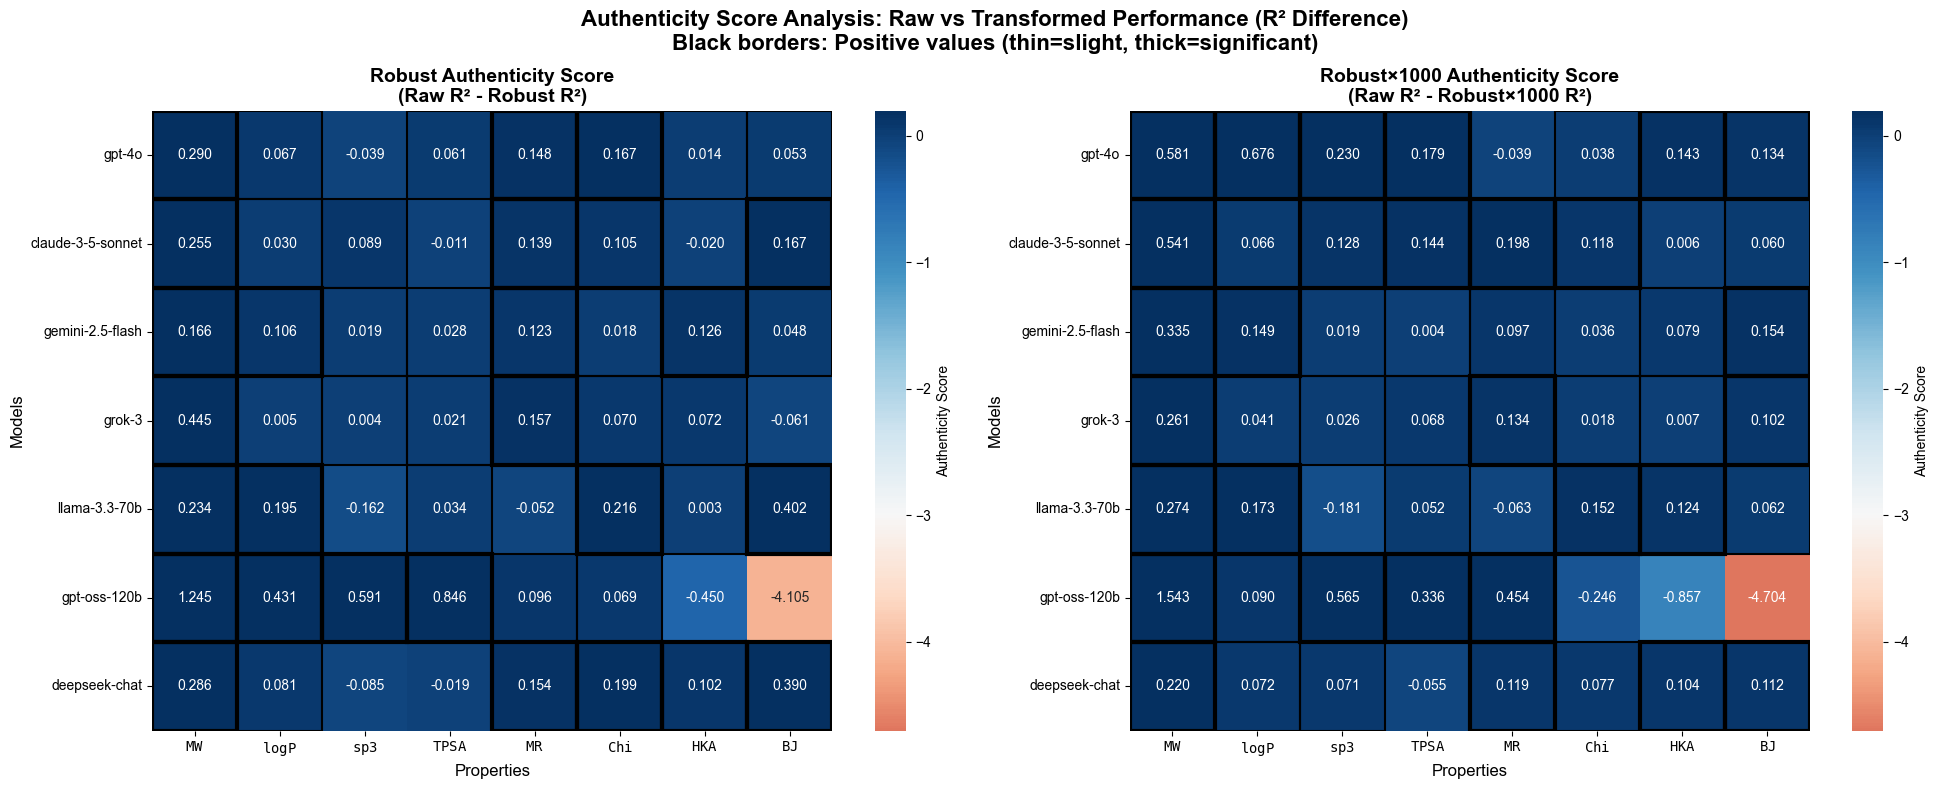

Robust Authenticity Score Statistics:
Mean: 0.064
Std: 0.611
Min: -4.105
Max: 1.245

Robust×1000 Authenticity Score Statistics:
Mean: 0.058
Std: 0.703
Min: -4.704
Max: 1.543


In [96]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["gpt-4o", "claude-3-5-sonnet", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]

# Authenticity Score 계산: Raw R² - Transformed R² (양수가 Raw가 더 좋다는 의미)

# Robust Authenticity Score 계산
robust_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust_r2 = data[("Robust", prop)][model_idx]
        
        robust_authenticity[i, j] = raw_r2 - robust_r2

# Robust×1000 Authenticity Score 계산
robust1000_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust1000_r2 = data[("Robust×1000", prop)][model_idx]
        
        robust1000_authenticity[i, j] = raw_r2 - robust1000_r2

# 2개의 히트맵을 나란히 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 임계값 설정
positive_threshold = 0.0  # 양수 임계값
significant_threshold = 0.1  # 유의미한 값 임계값

# 색상 범위 설정 (양수 쪽에 threshold 적용)
vmax_threshold = 0.2  # 이 값 이상은 모두 같은 색으로
vmin = min(np.nanmin(robust_authenticity), np.nanmin(robust1000_authenticity))

center = -3

# Robust Authenticity Score 히트맵
df_robust = pd.DataFrame(robust_authenticity, index=models, columns=properties)
sns.heatmap(df_robust, annot=True, fmt='.3f', cmap='RdBu', center=center, 
            vmin=vmin, vmax=vmax_threshold,
            ax=ax1, cbar_kws={'label': 'Authenticity Score'})

# 양수값과 유의미한 값에 테두리 추가
for i in range(len(models)):
    for j in range(len(properties)):
        value = robust_authenticity[i, j]
        if value > significant_threshold:  # 유의미한 값
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax1.add_patch(rect)
        elif value > positive_threshold:  # 양수값
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax1.add_patch(rect)

ax1.set_title('Robust Authenticity Score\n(Raw R² - Robust R²)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Properties', fontsize=12)
ax1.set_ylabel('Models', fontsize=12)

# Robust×1000 Authenticity Score 히트맵
df_robust1000 = pd.DataFrame(robust1000_authenticity, index=models, columns=properties)
sns.heatmap(df_robust1000, annot=True, fmt='.3f', cmap='RdBu', center=center,
            vmin=vmin, vmax=vmax_threshold,
            ax=ax2, cbar_kws={'label': 'Authenticity Score'})

# 양수값과 유의미한 값에 테두리 추가
for i in range(len(models)):
    for j in range(len(properties)):
        value = robust1000_authenticity[i, j]
        if value > significant_threshold:  # 유의미한 값
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax2.add_patch(rect)
        elif value > positive_threshold:  # 양수값
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax2.add_patch(rect)

ax2.set_title('Robust×1000 Authenticity Score\n(Raw R² - Robust×1000 R²)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Properties', fontsize=12)
ax2.set_ylabel('Models', fontsize=12)

# 전체 제목
fig.suptitle('Authenticity Score Analysis: Raw vs Transformed Performance (R² Difference)\nBlack borders: Positive values (thin=slight, thick=significant)', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("Robust Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust_authenticity):.3f}")
print(f"Std: {np.nanstd(robust_authenticity):.3f}")
print(f"Min: {np.nanmin(robust_authenticity):.3f}")
print(f"Max: {np.nanmax(robust_authenticity):.3f}")

print("\nRobust×1000 Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust1000_authenticity):.3f}")
print(f"Std: {np.nanstd(robust1000_authenticity):.3f}")
print(f"Min: {np.nanmin(robust1000_authenticity):.3f}")
print(f"Max: {np.nanmax(robust1000_authenticity):.3f}")

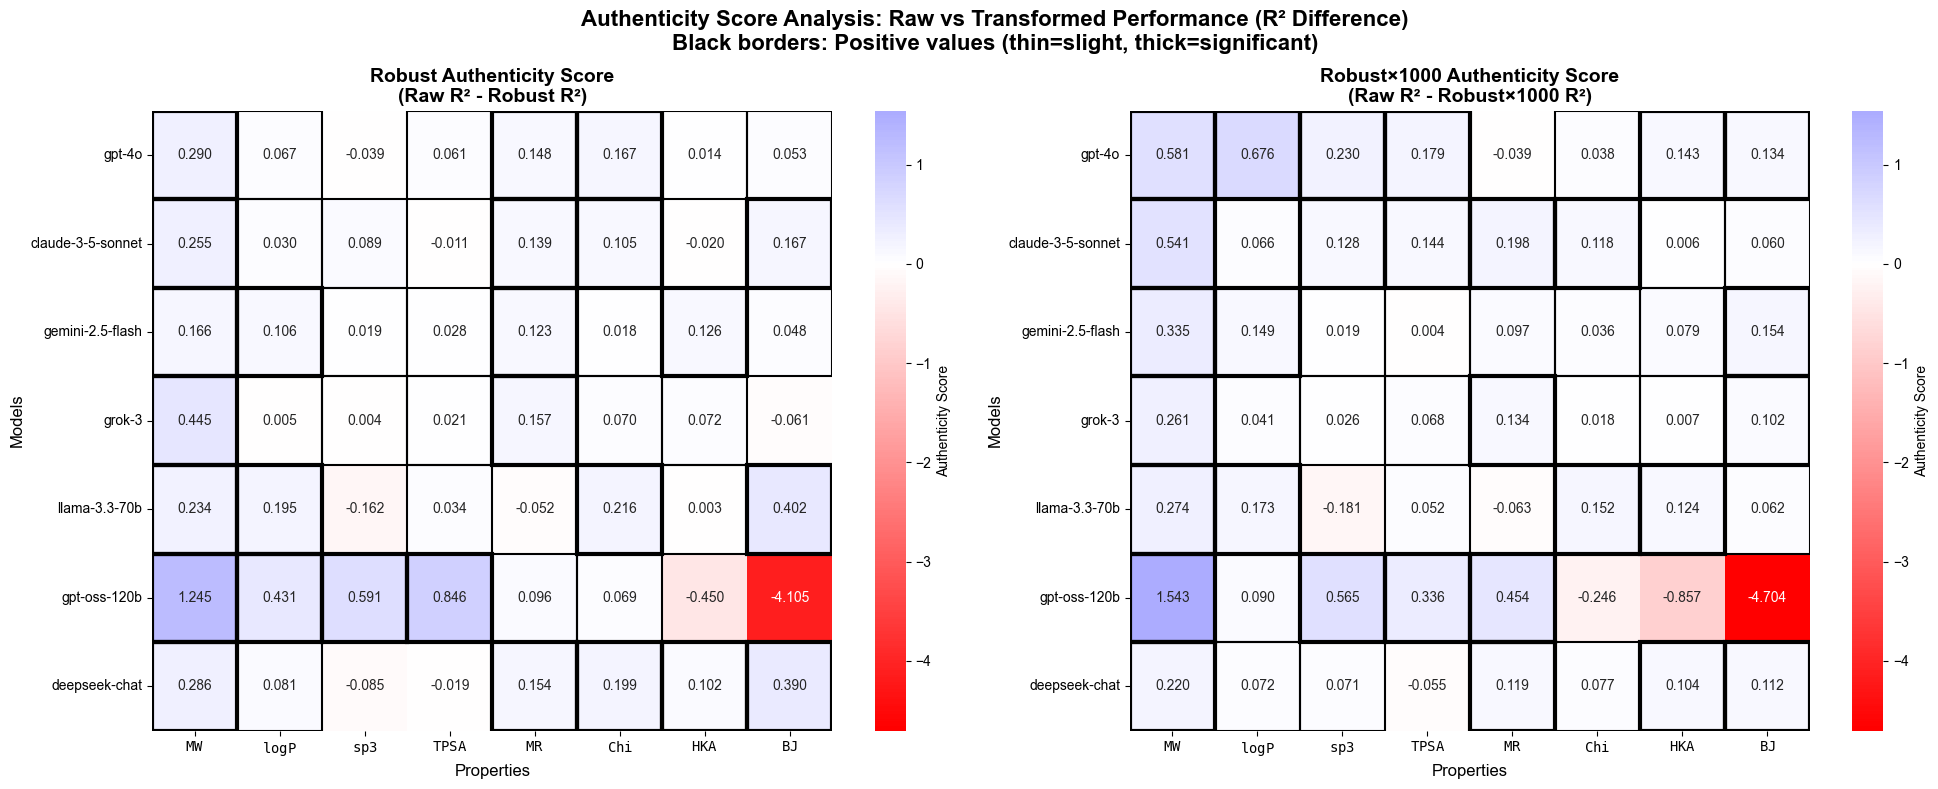

Robust Authenticity Score Statistics:
Mean: 0.064
Std: 0.611
Min: -4.105
Max: 1.245

Robust×1000 Authenticity Score Statistics:
Mean: 0.058
Std: 0.703
Min: -4.704
Max: 1.543


In [97]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["gpt-4o", "claude-3-5-sonnet", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]

# Authenticity Score 계산: Raw R² - Transformed R² (양수가 Raw가 더 좋다는 의미)

# Robust Authenticity Score 계산
robust_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust_r2 = data[("Robust", prop)][model_idx]
        
        robust_authenticity[i, j] = raw_r2 - robust_r2

# Robust×1000 Authenticity Score 계산
robust1000_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust1000_r2 = data[("Robust×1000", prop)][model_idx]
        
        robust1000_authenticity[i, j] = raw_r2 - robust1000_r2

# 2개의 히트맵을 나란히 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 임계값 설정
positive_threshold = 0.0  # 양수 임계값
significant_threshold = 0.1  # 유의미한 값 임계값

# 커스텀 colormap 생성: 음수는 Red->White, 양수는 White->Blue
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

# 색상 정의: 빨강 -> 흰색 -> 파랑
colors = ['red', 'white', 'blue']
n_bins = 256
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# 색상 범위 설정
vmin = min(np.nanmin(robust_authenticity), np.nanmin(robust1000_authenticity))
vmax = max(np.nanmax(robust_authenticity), np.nanmax(robust1000_authenticity))

# Robust Authenticity Score 히트맵
df_robust = pd.DataFrame(robust_authenticity, index=models, columns=properties)
sns.heatmap(df_robust, annot=True, fmt='.3f', cmap=cmap, center=0, 
            vmin=vmin, vmax=vmax,
            ax=ax1, cbar_kws={'label': 'Authenticity Score'})

# 양수값과 유의미한 값에 테두리 추가
for i in range(len(models)):
    for j in range(len(properties)):
        value = robust_authenticity[i, j]
        if value > significant_threshold:  # 유의미한 값
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax1.add_patch(rect)
        elif value > positive_threshold:  # 양수값
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax1.add_patch(rect)

ax1.set_title('Robust Authenticity Score\n(Raw R² - Robust R²)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Properties', fontsize=12)
ax1.set_ylabel('Models', fontsize=12)

# Robust×1000 Authenticity Score 히트맵
df_robust1000 = pd.DataFrame(robust1000_authenticity, index=models, columns=properties)
sns.heatmap(df_robust1000, annot=True, fmt='.3f', cmap=cmap, center=0,
            vmin=vmin, vmax=vmax,
            ax=ax2, cbar_kws={'label': 'Authenticity Score'})

# 양수값과 유의미한 값에 테두리 추가
for i in range(len(models)):
    for j in range(len(properties)):
        value = robust1000_authenticity[i, j]
        if value > significant_threshold:  # 유의미한 값
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax2.add_patch(rect)
        elif value > positive_threshold:  # 양수값
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax2.add_patch(rect)

ax2.set_title('Robust×1000 Authenticity Score\n(Raw R² - Robust×1000 R²)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Properties', fontsize=12)
ax2.set_ylabel('Models', fontsize=12)

# 전체 제목
fig.suptitle('Authenticity Score Analysis: Raw vs Transformed Performance (R² Difference)\nBlack borders: Positive values (thin=slight, thick=significant)', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("Robust Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust_authenticity):.3f}")
print(f"Std: {np.nanstd(robust_authenticity):.3f}")
print(f"Min: {np.nanmin(robust_authenticity):.3f}")
print(f"Max: {np.nanmax(robust_authenticity):.3f}")

print("\nRobust×1000 Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust1000_authenticity):.3f}")
print(f"Std: {np.nanstd(robust1000_authenticity):.3f}")
print(f"Min: {np.nanmin(robust1000_authenticity):.3f}")
print(f"Max: {np.nanmax(robust1000_authenticity):.3f}")

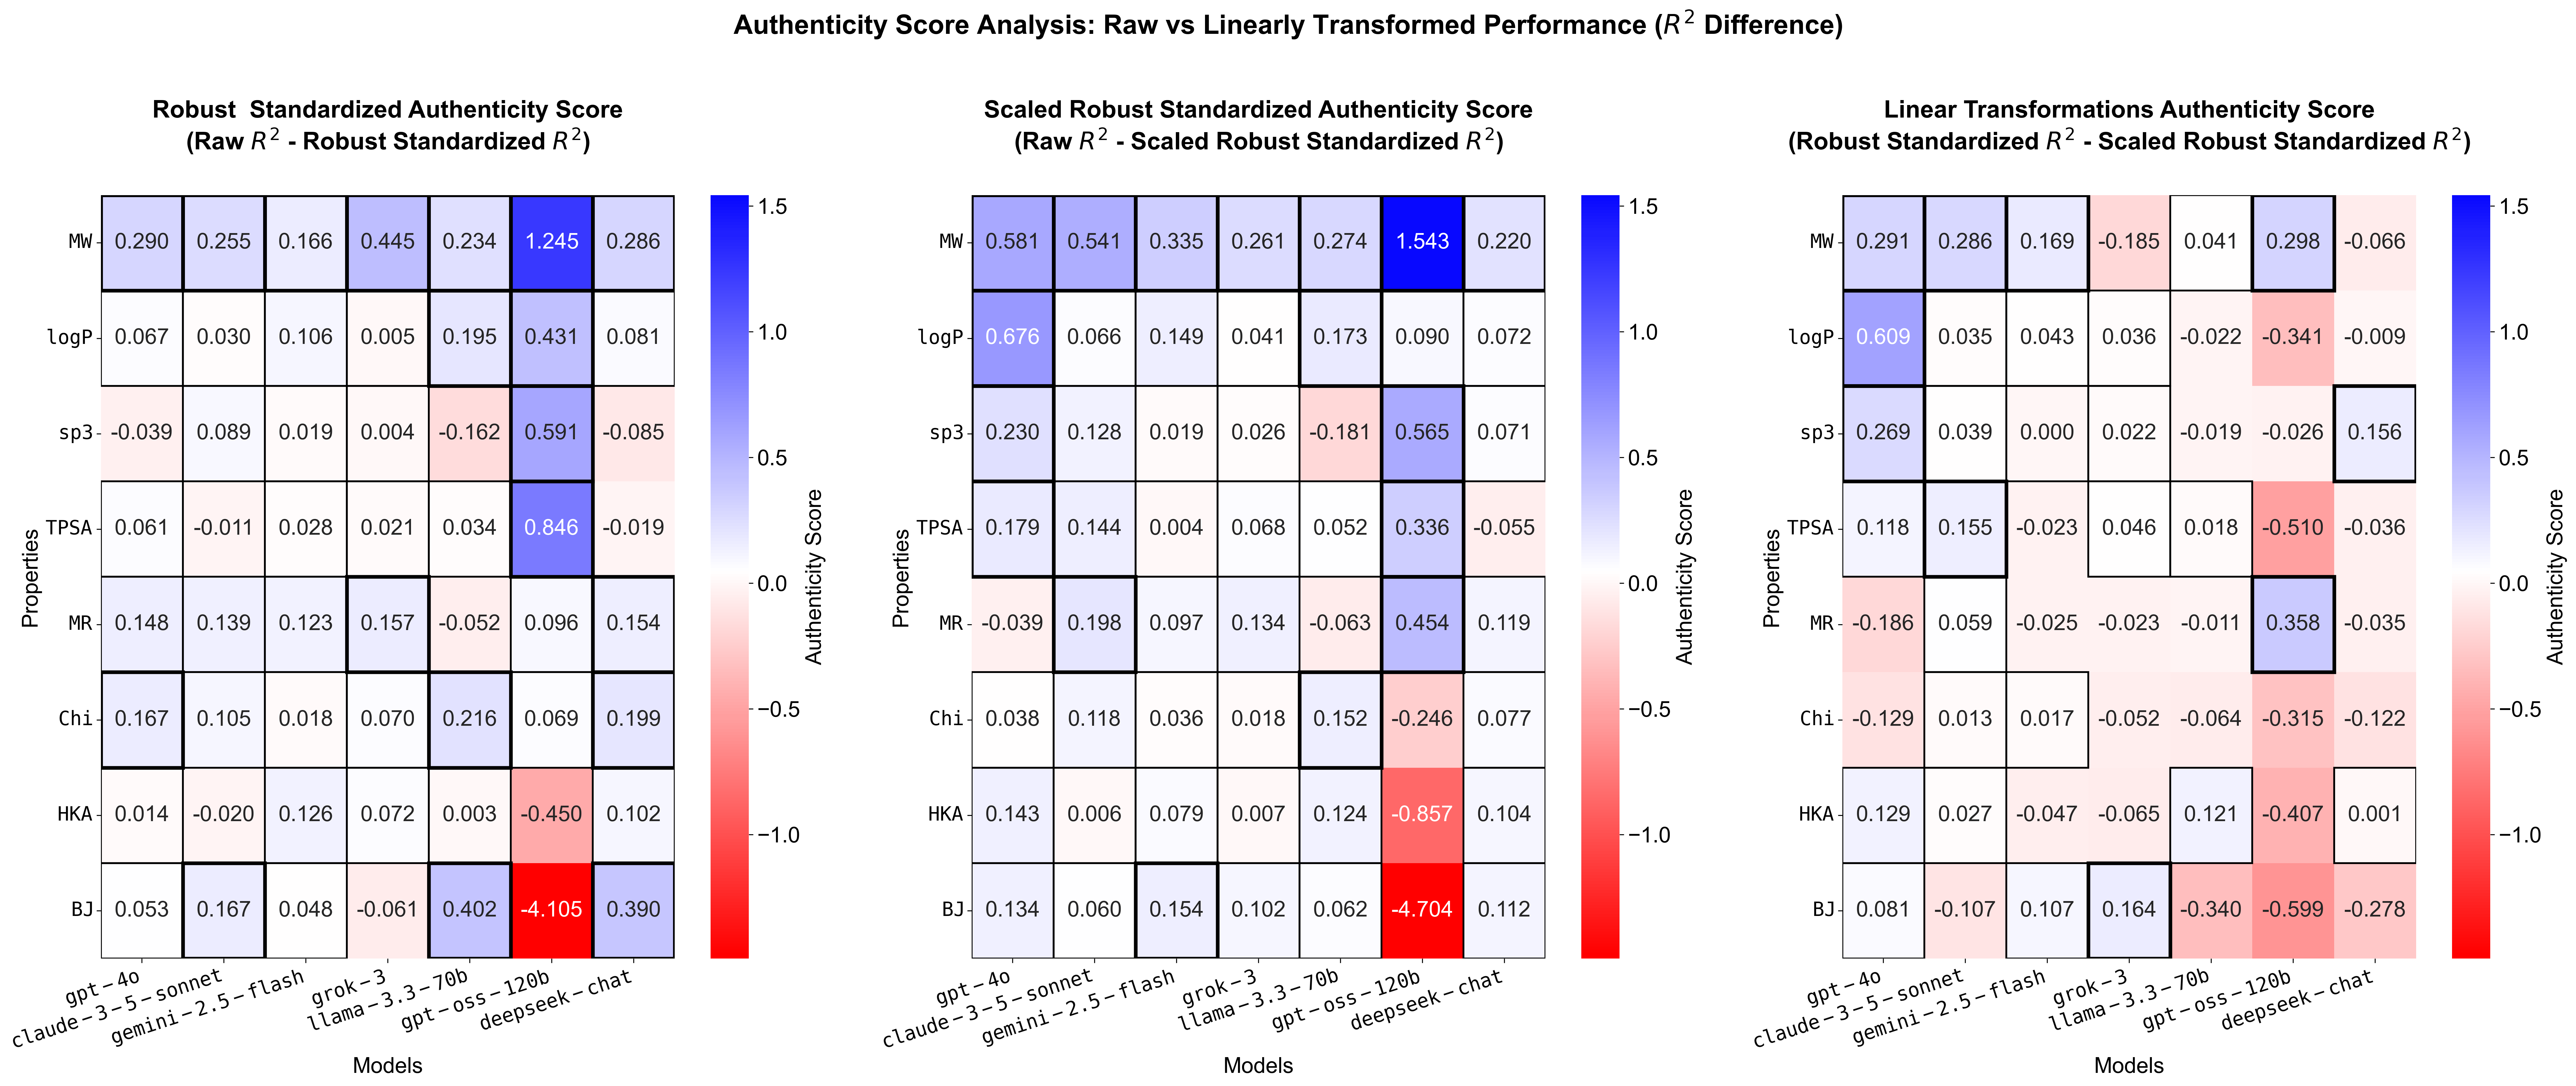

Robust Authenticity Score Statistics:
Mean: 0.064
Std: 0.611
Min: -4.105
Max: 1.245

Robust×1000 Authenticity Score Statistics:
Mean: 0.058
Std: 0.703
Min: -4.704
Max: 1.543


In [120]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# 기존에 정의된 데이터 사용
properties = [r"$\mathtt{MW}$", r"$\mathtt{logP}$", r"$\mathtt{sp3}$", r"$\mathtt{TPSA}$", r"$\mathtt{MR}$", r"$\mathtt{Chi}$", r"$\mathtt{HKA}$", r"$\mathtt{BJ}$"]
models = ["$\mathtt{gpt-4o}$", "$\mathtt{claude-3-5-sonnet}$", "$\mathtt{gemini-2.5-flash}$", "$\mathtt{grok-3}$", "$\mathtt{llama-3.3-70b}$", "$\mathtt{gpt-oss-120b}$", "$\mathtt{deepseek-chat}$"]

# Authenticity Score 계산: Raw R² - Transformed R² (양수가 Raw가 더 좋다는 의미)

# Robust Authenticity Score 계산
robust_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust_r2 = data[("Robust Standardized", prop)][model_idx]
        
        robust_authenticity[i, j] = raw_r2 - robust_r2

# Robust×1000 Authenticity Score 계산
robust1000_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        raw_r2 = data[("Raw", prop)][model_idx]
        robust1000_r2 = data[("Scaled Robust Standardized", prop)][model_idx]
        
        robust1000_authenticity[i, j] = raw_r2 - robust1000_r2

# Robust×1000 Authenticity Score 계산
robusts_authenticity = np.zeros((len(models), len(properties)))
for i, model_idx in enumerate(range(len(models))):
    for j, prop in enumerate(properties):
        robust_r2 = data[("Robust Standardized", prop)][model_idx]
        robust1000_r2 = data[("Scaled Robust Standardized", prop)][model_idx]
        
        robusts_authenticity[i, j] = robust_r2 - robust1000_r2

# 2개의 히트맵을 나란히 표시
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 12), dpi = 300)

# 임계값 설정
positive_threshold = 0.0  # 양수 임계값
significant_threshold = 0.15  # 유의미한 값 임계값

# 커스텀 colormap 생성: 음수는 Red->White, 양수는 White->Blue
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors

# 색상 정의: 빨강 -> 흰색 -> 파랑
colors = ['red', 'white', 'blue']
n_bins = 256
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

center = 0.05
# 색상 범위 설정 (음수 쪽에 threshold 적용하고 대칭적 범위)
vmax_data = max(np.nanmax(robust_authenticity), np.nanmax(robust1000_authenticity))
vmax = vmax_data  # 양수 최대값 사용
vmin = -vmax + center     # 대칭적으로 음수 범위 설정

# 이제 -vmax보다 작은 음수값들은 모두 같은 진한 빨강으로 표시됨

# Robust Authenticity Score 히트맵 (전치됨)
df_robust = pd.DataFrame(robust_authenticity, index=models, columns=properties).T  # .T로 전치
sns.heatmap(df_robust, annot=True, fmt='.3f', cmap=cmap, center=center, 
            vmin=vmin, vmax=vmax,
            ax=ax1, cbar_kws={'label': 'Authenticity Score'}, annot_kws={"size": 18})

# 양수값과 유의미한 값에 테두리 추가 (전치된 인덱스에 맞춰 조정)
for i in range(len(properties)):  # properties가 이제 행
    for j in range(len(models)):  # models가 이제 열
        value = robust_authenticity[j, i]  # 원래 배열의 인덱스는 그대로
        if value > significant_threshold:  # 유의미한 값
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax1.add_patch(rect)
        elif value > positive_threshold:  # 양수값
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax1.add_patch(rect)

ax1.set_title('Robust  Standardized Authenticity Score\n(Raw $R^2$ - Robust Standardized $R^2$)', fontsize=20, fontweight='bold', y = 1.05)
ax1.set_xlabel('Models', fontsize=18)  # x축이 이제 Models
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=18, ha="right", va="top", fontsize=16)  # 모델명 회전
ax1.set_ylabel('Properties', fontsize=18)  # y축이 이제 Properties
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=16)  # Properties는 회전 안함
cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)   # 숫자 크기
cbar.set_label("Authenticity Score", fontsize=18)  # 라벨 크기

# Robust×1000 Authenticity Score 히트맵 (전치됨)
df_robust1000 = pd.DataFrame(robust1000_authenticity, index=models, columns=properties).T  # .T로 전치
sns.heatmap(df_robust1000, annot=True, fmt='.3f', cmap=cmap, center=center,
            vmin=vmin, vmax=vmax,
            ax=ax2, cbar_kws={'label': 'Authenticity Score'}, annot_kws={"size": 18})

# 양수값과 유의미한 값에 테두리 추가 (전치된 인덱스에 맞춰 조정)
for i in range(len(properties)):  # properties가 이제 행
    for j in range(len(models)):  # models가 이제 열
        value = robust1000_authenticity[j, i]  # 원래 배열의 인덱스는 그대로
        if value > significant_threshold:  # 유의미한 값
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax2.add_patch(rect)
        elif value > positive_threshold:  # 양수값
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax2.add_patch(rect)

ax2.set_title('Scaled Robust Standardized Authenticity Score\n(Raw $R^2$ - Scaled Robust Standardized $R^2$)', fontsize=20, fontweight='bold', y = 1.05)
ax2.set_xlabel('Models', fontsize=18)  # x축이 이제 Models
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=18, ha="right", va="top", fontsize=16)  # 모델명 회전
ax2.set_ylabel('Properties', fontsize=18)  # y축이 이제 Properties
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=16)  # Properties는 회전 안함
cbar = ax2.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)   # 숫자 크기
cbar.set_label("Authenticity Score", fontsize=18)  # 라벨 크기

# Robust×1000 Authenticity Score 히트맵 (전치됨)
df_robusts = pd.DataFrame(robusts_authenticity, index=models, columns=properties).T  # .T로 전치
sns.heatmap(df_robusts, annot=True, fmt='.3f', cmap=cmap, center=center,
            vmin=vmin, vmax=vmax,
            ax=ax3, cbar_kws={'label': 'Authenticity Score'}, annot_kws={"size": 18})

# 양수값과 유의미한 값에 테두리 추가 (전치된 인덱스에 맞춰 조정)
for i in range(len(properties)):  # properties가 이제 행
    for j in range(len(models)):  # models가 이제 열
        value = robusts_authenticity[j, i]  # 원래 배열의 인덱스는 그대로
        if value > significant_threshold:  # 유의미한 값
            # 굵은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3)
            ax3.add_patch(rect)
        elif value > positive_threshold:  # 양수값
            # 얇은 검은 테두리
            rect = plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=1.5)
            ax3.add_patch(rect)

ax3.set_title('Linear Transformations Authenticity Score\n(Robust Standardized $R^2$ - Scaled Robust Standardized $R^2$)', fontsize=20, fontweight='bold', y = 1.05)
ax3.set_xlabel('Models', fontsize=18)  # x축이 이제 Models
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=18, ha="right", va="top", fontsize=16)  # 모델명 회전
ax3.set_ylabel('Properties', fontsize=18)  # y축이 이제 Properties
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0, fontsize=16)  # Properties는 회전 안함
cbar = ax3.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)   # 숫자 크기
cbar.set_label("Authenticity Score", fontsize=18)  # 라벨 크기

# 전체 제목
fig.suptitle(r'Authenticity Score Analysis: Raw vs Linearly Transformed Performance ($R^2$ Difference)', 
             fontsize=22, fontweight='bold', y = 1.03)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("Robust Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust_authenticity):.3f}")
print(f"Std: {np.nanstd(robust_authenticity):.3f}")
print(f"Min: {np.nanmin(robust_authenticity):.3f}")
print(f"Max: {np.nanmax(robust_authenticity):.3f}")

print("\nRobust×1000 Authenticity Score Statistics:")
print(f"Mean: {np.nanmean(robust1000_authenticity):.3f}")
print(f"Std: {np.nanstd(robust1000_authenticity):.3f}")
print(f"Min: {np.nanmin(robust1000_authenticity):.3f}")
print(f"Max: {np.nanmax(robust1000_authenticity):.3f}")

In [107]:

import numpy as np
import pandas as pd

# 모델과 속성 정의
models = ["gpt-4o", "claude-3-5-sonnet", "gemini-2.5-flash", "grok-3", "llama-3.3-70b", "gpt-oss-120b", "deepseek-chat"]
properties = ["MW", "logP", "sp3", "TPSA", "MR", "Chi", "HKA", "BJ"]
transforms = ["Raw", "Robust", "Robust×1000"]

# 각 변환별로 순위 계산 및 종합
all_rankings = {}

for transform in transforms:
    print(f"\n=== {transform} Transform Rankings ===")
    
    # 현재 변환의 데이터 추출
    transform_data = {}
    for prop in properties:
        prop_key = r"$\mathtt{" + prop + "}$"
        transform_data[prop] = data[(transform, prop_key)]
    
    # DataFrame 생성 (모델을 행으로, 속성을 열로)
    df = pd.DataFrame(transform_data, index=models)
    
    # 각 속성별로 순위 계산 (R² 높을수록 좋음 = 순위 낮음)
    rankings = df.rank(method='min', ascending=False)
    
    # 각 속성별 순위 출력
    print("\n각 Task별 순위:")
    for prop in properties:
        print(f"{prop}:")
        prop_rankings = rankings[prop].sort_values()
        for model, rank in prop_rankings.items():
            r2_value = df.loc[model, prop]
            print(f"  {int(rank)}위: {model} (R² = {r2_value:.3f})")
        print()
    
    # 각 모델별 순위 합산
    total_rankings = rankings.sum(axis=1).sort_values()
    
    print("종합 순위 (순위 합산 기준):")
    for i, (model, total_rank) in enumerate(total_rankings.items(), 1):
        avg_rank = total_rank / len(properties)
        print(f"{i}위: {model} (합산: {total_rank:.0f}, 평균 순위: {avg_rank:.1f})")
    
    # 결과 저장
    all_rankings[transform] = {
        'detailed': rankings,
        'total': total_rankings,
        'data': df
    }

# 전체 변환에서의 종합 순위 (모든 변환의 순위 합산)
print(f"\n{'='*50}")
print("전체 변환 종합 순위 (Raw + ZN + LT)")
print(f"{'='*50}")

all_total_rankings = pd.Series(0.0, index=models)
for transform in transforms:
    all_total_rankings += all_rankings[transform]['total']

final_rankings = all_total_rankings.sort_values()

print("\n최종 종합 순위:")
for i, (model, total_rank) in enumerate(final_rankings.items(), 1):
    avg_rank = total_rank / (len(properties) * len(transforms))
    print(f"{i}위: {model}")
    print(f"      총 순위 합산: {total_rank:.0f}")
    print(f"      평균 순위: {avg_rank:.1f}")
    
    # 각 변환별 기여도
    transform_contributions = []
    for transform in transforms:
        contrib = all_rankings[transform]['total'][model]
        transform_contributions.append(f"{transform}: {contrib:.0f}")
    print(f"      변환별 기여: {' | '.join(transform_contributions)}")
    print()

# 각 변환별 1위 모델 요약
print("\n각 변환별 1위 모델:")
for transform in transforms:
    best_model = all_rankings[transform]['total'].index[0]
    best_score = all_rankings[transform]['total'].iloc[0]
    print(f"{transform}: {best_model} (순위 합산: {best_score:.0f})")

# 가장 일관성 있는 모델 (순위 표준편차가 낮은 모델)
print("\n모델별 순위 일관성 (표준편차가 낮을수록 일관성 높음):")
consistency_scores = {}
for model in models:
    all_ranks = []
    for transform in transforms:
        for prop in properties:
            rank = all_rankings[transform]['detailed'].loc[model, prop]
            all_ranks.append(rank)
    consistency_scores[model] = np.std(all_ranks)

consistency_df = pd.Series(consistency_scores).sort_values()
for model, std in consistency_df.items():
    print(f"{model}: 표준편차 = {std:.2f}")


=== Raw Transform Rankings ===

각 Task별 순위:
MW:
  1위: claude-3-5-sonnet (R² = 0.985)
  2위: gpt-oss-120b (R² = 0.980)
  3위: deepseek-chat (R² = 0.968)
  4위: grok-3 (R² = 0.950)
  5위: gpt-4o (R² = 0.892)
  6위: llama-3.3-70b (R² = 0.890)
  7위: gemini-2.5-flash (R² = 0.888)

logP:
  1위: gemini-2.5-flash (R² = 0.813)
  2위: claude-3-5-sonnet (R² = 0.802)
  3위: gpt-oss-120b (R² = 0.780)
  4위: grok-3 (R² = 0.705)
  5위: gpt-4o (R² = 0.626)
  6위: deepseek-chat (R² = 0.583)
  7위: llama-3.3-70b (R² = 0.410)

sp3:
  1위: gpt-oss-120b (R² = 0.974)
  2위: claude-3-5-sonnet (R² = 0.762)
  3위: gemini-2.5-flash (R² = 0.682)
  4위: grok-3 (R² = 0.682)
  5위: deepseek-chat (R² = 0.593)
  6위: gpt-4o (R² = 0.592)
  7위: llama-3.3-70b (R² = 0.421)

TPSA:
  1위: gpt-oss-120b (R² = 0.869)
  2위: grok-3 (R² = 0.667)
  3위: claude-3-5-sonnet (R² = 0.649)
  4위: gemini-2.5-flash (R² = 0.639)
  5위: deepseek-chat (R² = 0.626)
  6위: gpt-4o (R² = 0.625)
  7위: llama-3.3-70b (R² = 0.554)

MR:
  1위: claude-3-5-sonnet (R² = 0.90

In [ ]:
x = np.linspace(-1, 1, 1000)
